Importación de Librerias

IMPORTACIÓN DE LIBRERÍAS

In [1]:
#Para el Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.make_holidays import make_holidays_df

#Para el modelo holt winters
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


import pickle
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error #evaluar modelo
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from math import sqrt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#  Función para descomponer TS y ver los gráficos
def ts_descomp(ts_to_decompose, period, title):
    result = seasonal_decompose(ts_to_decompose, period=period)

    fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 6))
    titles = ['Observed', 'Trend', 'Seasonal', 'Residual']

    for i, attr in enumerate(['observed', 'trend', 'seasonal', 'resid']):
        getattr(result, attr).plot(ax=axes[i], legend=False)
        axes[i].set_ylabel(titles[i])

    axes[0].set_title(title)
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv(r"C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\df_merge_total.csv") #importamos el archivo csv

# 1 DF con Ventas Diarias para modelos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item        object 
 2   category    object 
 3   department  object 
 4   store       object 
 5   store_code  object 
 6   d           object 
 7   sales       int64  
 8   yearweek    float64
 9   sell_price  float64
 10  date        object 
 11  weekday     object 
 12  event       object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.5+ GB


In [5]:
df.isnull().sum()

id            0
item          0
category      0
department    0
store         0
store_code    0
d             0
sales         0
yearweek      0
sell_price    0
date          0
weekday       0
event         0
dtype: int64

In [6]:
df

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,201105.0,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,201105.0,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,201105.0,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,201105.0,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,201105.0,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027952,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,1,201617.0,3.5760,2016-04-24,Sunday,Weekend
46027953,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,201617.0,2.9760,2016-04-24,Sunday,Weekend
46027954,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,201617.0,4.7760,2016-04-24,Sunday,Weekend
46027955,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,3,201617.0,1.5360,2016-04-24,Sunday,Weekend


In [7]:
df["yearweek"].nunique() 

279

In [8]:
df['yearweek'] = df['yearweek'].astype(int)
df['yearweek']=df['yearweek'].astype('str')
df['yearweek'] = df['yearweek'].apply(lambda x: datetime.strptime(x + '0', "%Y%W%w"))

In [9]:
df #yearkweek ahora es datatime

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,2011-02-06,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,2011-02-06,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,2011-02-06,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027952,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,1,2016-05-01,3.5760,2016-04-24,Sunday,Weekend
46027953,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,2016-05-01,2.9760,2016-04-24,Sunday,Weekend
46027954,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,2016-05-01,4.7760,2016-04-24,Sunday,Weekend
46027955,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,3,2016-05-01,1.5360,2016-04-24,Sunday,Weekend


In [10]:
date_uni=df['date'].nunique()
print("fechas/días únicos son:", date_uni)
d_uni=df['d'].nunique()
print("días únicos son:", d_uni)
sales_uni=df['sales'].nunique()
print("sales/ventas únicas son:", sales_uni)
yearweek_unique = df['yearweek'].nunique() 
print("Semanas únicas son:", yearweek_unique)
iduni=df['id'].nunique()
print("id únicas son:", iduni)
item_uni=df['item'].nunique()
print("item únicos son:", item_uni)
category_uni=df['category'].nunique()
print("categorias únicas son:", category_uni)
department_uni=df['department'].nunique()
print("departmentos únicos son:", department_uni)
store_uni=df['store'].nunique()
print("Tiendas únicas son:", store_uni)
event_uni=df['event'].nunique()
print("eventos únicos son:", event_uni)


fechas/días únicos son: 1913
días únicos son: 1913
sales/ventas únicas son: 419
Semanas únicas son: 274
id únicas son: 30490
item únicos son: 3049
categorias únicas son: 3
departmentos únicos son: 7
Tiendas únicas son: 10
eventos únicos son: 9


In [11]:
fechas_unicas=df['date'].unique() #fecha inicio 2011-01-29 y fecha fin 2016-04-24
fechas_unicas

array(['2011-01-29', '2011-01-30', '2011-01-31', ..., '2016-04-22',
       '2016-04-23', '2016-04-24'], dtype=object)

In [12]:
filas_con_valor_cerots = df[df['sales'] == 0] # hay en total 27446360 "sales" con venta 0,no eliminamos porque el modelo necesita considerar los días que no hubieron ventas
filas_con_valor_cerots.head(2)

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend


In [13]:
# Convertimos la variable 'date' a datetime para el modelo
df['date'] = pd.to_datetime(df['date'])

In [14]:
#VENTAS DIARIAS (USAR para el 1modelo prophet) 
ts_df = df.groupby('date')['sales'].sum().reset_index() #agrupamos para que sean fechas únicas en orden

In [15]:
ts_df

,date,sales
0,2011-01-29,32631
1,2011-01-30,31749
2,2011-01-31,23783
3,2011-02-01,25412
4,2011-02-02,19146
...,...,...
1908,2016-04-20,35343
1909,2016-04-21,35033
1910,2016-04-22,40517
1911,2016-04-23,48962


In [16]:
ts_df = ts_df.rename(columns={'date': 'ds', 'sales': 'y'}) #renombramos para el modelo
# ya está en orden cronológico por eso no aplicamos   df_agrupadoor = ts_df.sort_values('ds')


In [17]:
ts_df

,ds,y
0,2011-01-29,32631
1,2011-01-30,31749
2,2011-01-31,23783
3,2011-02-01,25412
4,2011-02-02,19146
...,...,...
1908,2016-04-20,35343
1909,2016-04-21,35033
1910,2016-04-22,40517
1911,2016-04-23,48962


In [18]:
ts_df.info() #no tiene nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1913 non-null   datetime64[ns]
 1   y       1913 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 30.0 KB


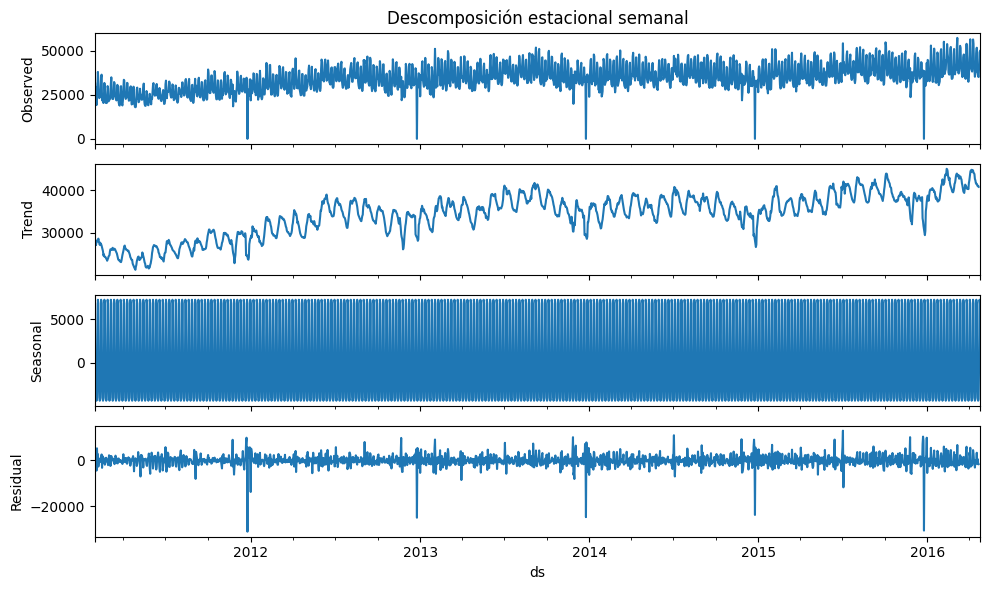

In [19]:
# Convierto 'ds' como el índice  para estos gráficos(descomposición), para el modelo fit debe estar reseteado el índice(reset) 
ts_df.set_index('ds', inplace=True)
ts_descomp(ts_to_decompose = ts_df, period = 7, title = "Descomposición estacional semanal")  # Si quisiera anual sería 365 o mensual 30 en period

In [20]:
ts_df.reset_index(inplace=True) #reseteo el índice "ds" para el modelo


## 1.1 MODELO PROPHET

In [21]:
prophet_dfts=ts_df.copy() #renombramos df para el modelo prophet.

In [22]:
prophet = Prophet() #crea la instancia del modelo(inicialiazción)
prophet.add_country_holidays(country_name='US')# Añade automáticamente los festivos de Estados Unidos al modelo

In [23]:
#fit para entrenar el modelo con los datos
prophet.fit(prophet_dfts) #ejecutar esto no mostrará ni una tabla

20:20:18 - cmdstanpy - INFO - Chain [1] start processing
20:20:18 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Con make_future_dataframe de prophet, nos da un df tan solo de las fechas que tenemos, más los periodos de ventas que queremos predecir en este caso 251 días o lo que deseemos 
future_df = prophet.make_future_dataframe(periods=251, freq='D', include_history=True) #251 días aclarándole que sea la frecuencia de Días
future_df # si pusieramos periodo solo de 28 días sería 1913 días + 28 de prediccion . Día final de registro que tenemos es el 24 de abril del 2016 , terminaría el domingo 22 de mayo si usamos ese periodo solo de 28 días (4 semanas que nos pedían en el email)

,ds
0,2011-01-29
1,2011-01-30
2,2011-01-31
3,2011-02-01
4,2011-02-02
...,...
2159,2016-12-27
2160,2016-12-28
2161,2016-12-29
2162,2016-12-30


In [25]:
# Usamos prophet para predecir las ventas de los días posteriores(comentado en la celda anterior) a nuestra última fecha
predic_dfprophet = prophet.predict(future_df)

la más importante son  yhat_lower,	yhat_upper y la principal que serían las "ventas predichas" es yhat

yhat son las predicciones centrales o "reales"

yhat_lower y yhat_upper son los valores de incertidumbre o rangos, ylower son las ventas predecidas mínimas y upper son las máximas como decir las más optimistas en el mejor de los casos

In [26]:
predic_dfprophet 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-29,23669.942240,26867.343402,33958.054077,23669.942240,23669.942240,0.0,0.0,0.0,0.0,...,7152.881201,7152.881201,7152.881201,-526.203321,-526.203321,-526.203321,0.0,0.0,0.0,30296.620120
1,2011-01-30,23682.144846,26432.620464,33924.479594,23682.144846,23682.144846,0.0,0.0,0.0,0.0,...,6865.642318,6865.642318,6865.642318,-378.544416,-378.544416,-378.544416,0.0,0.0,0.0,30169.242748
2,2011-01-31,23694.347453,17889.666626,25348.214857,23694.347453,23694.347453,0.0,0.0,0.0,0.0,...,-1846.728959,-1846.728959,-1846.728959,-230.383722,-230.383722,-230.383722,0.0,0.0,0.0,21617.234772
3,2011-02-01,23706.550059,15943.764404,23567.653244,23706.550059,23706.550059,0.0,0.0,0.0,0.0,...,-3889.821947,-3889.821947,-3889.821947,-83.394822,-83.394822,-83.394822,0.0,0.0,0.0,19733.333289
4,2011-02-02,23718.752665,15801.749430,23404.679899,23718.752665,23718.752665,0.0,0.0,0.0,0.0,...,-4253.923477,-4253.923477,-4253.923477,60.781793,60.781793,60.781793,0.0,0.0,0.0,19525.610981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2016-12-27,44894.063067,36427.788959,43963.096030,44147.842949,45723.386467,0.0,0.0,0.0,0.0,...,-3889.821947,-3889.821947,-3889.821947,-758.891032,-758.891032,-758.891032,0.0,0.0,0.0,40245.350088
2160,2016-12-28,44906.944488,36024.481426,43801.010011,44157.403086,45734.721235,0.0,0.0,0.0,0.0,...,-4253.923477,-4253.923477,-4253.923477,-783.592097,-783.592097,-783.592097,0.0,0.0,0.0,39869.428914
2161,2016-12-29,44919.825909,36114.203945,43954.367424,44167.028585,45752.137968,0.0,0.0,0.0,0.0,...,-3917.347404,-3917.347404,-3917.347404,-819.321150,-819.321150,-819.321150,0.0,0.0,0.0,40183.157355
2162,2016-12-30,44932.707330,39703.870748,47839.258287,44176.654085,45769.866955,0.0,0.0,0.0,0.0,...,-110.701732,-110.701732,-110.701732,-865.110988,-865.110988,-865.110988,0.0,0.0,0.0,43956.894610


In [27]:
# Combina los datos reales con las predicciones para verlo en una sola tabla
combined_df = future_df.merge(prophet_dfts, on='ds', how='left') 
combined_df = combined_df.merge(predic_dfprophet[['ds', 'yhat']], on='ds', how='left') 
combined_df

,ds,y,yhat
0,2011-01-29,32631.0,30296.620120
1,2011-01-30,31749.0,30169.242748
2,2011-01-31,23783.0,21617.234772
3,2011-02-01,25412.0,19733.333289
4,2011-02-02,19146.0,19525.610981
...,...,...,...
2159,2016-12-27,NaN,40245.350088
2160,2016-12-28,NaN,39869.428914
2161,2016-12-29,NaN,40183.157355
2162,2016-12-30,NaN,43956.894610


In [28]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2164 non-null   datetime64[ns]
 1   y       1913 non-null   float64       
 2   yhat    2164 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 50.8 KB


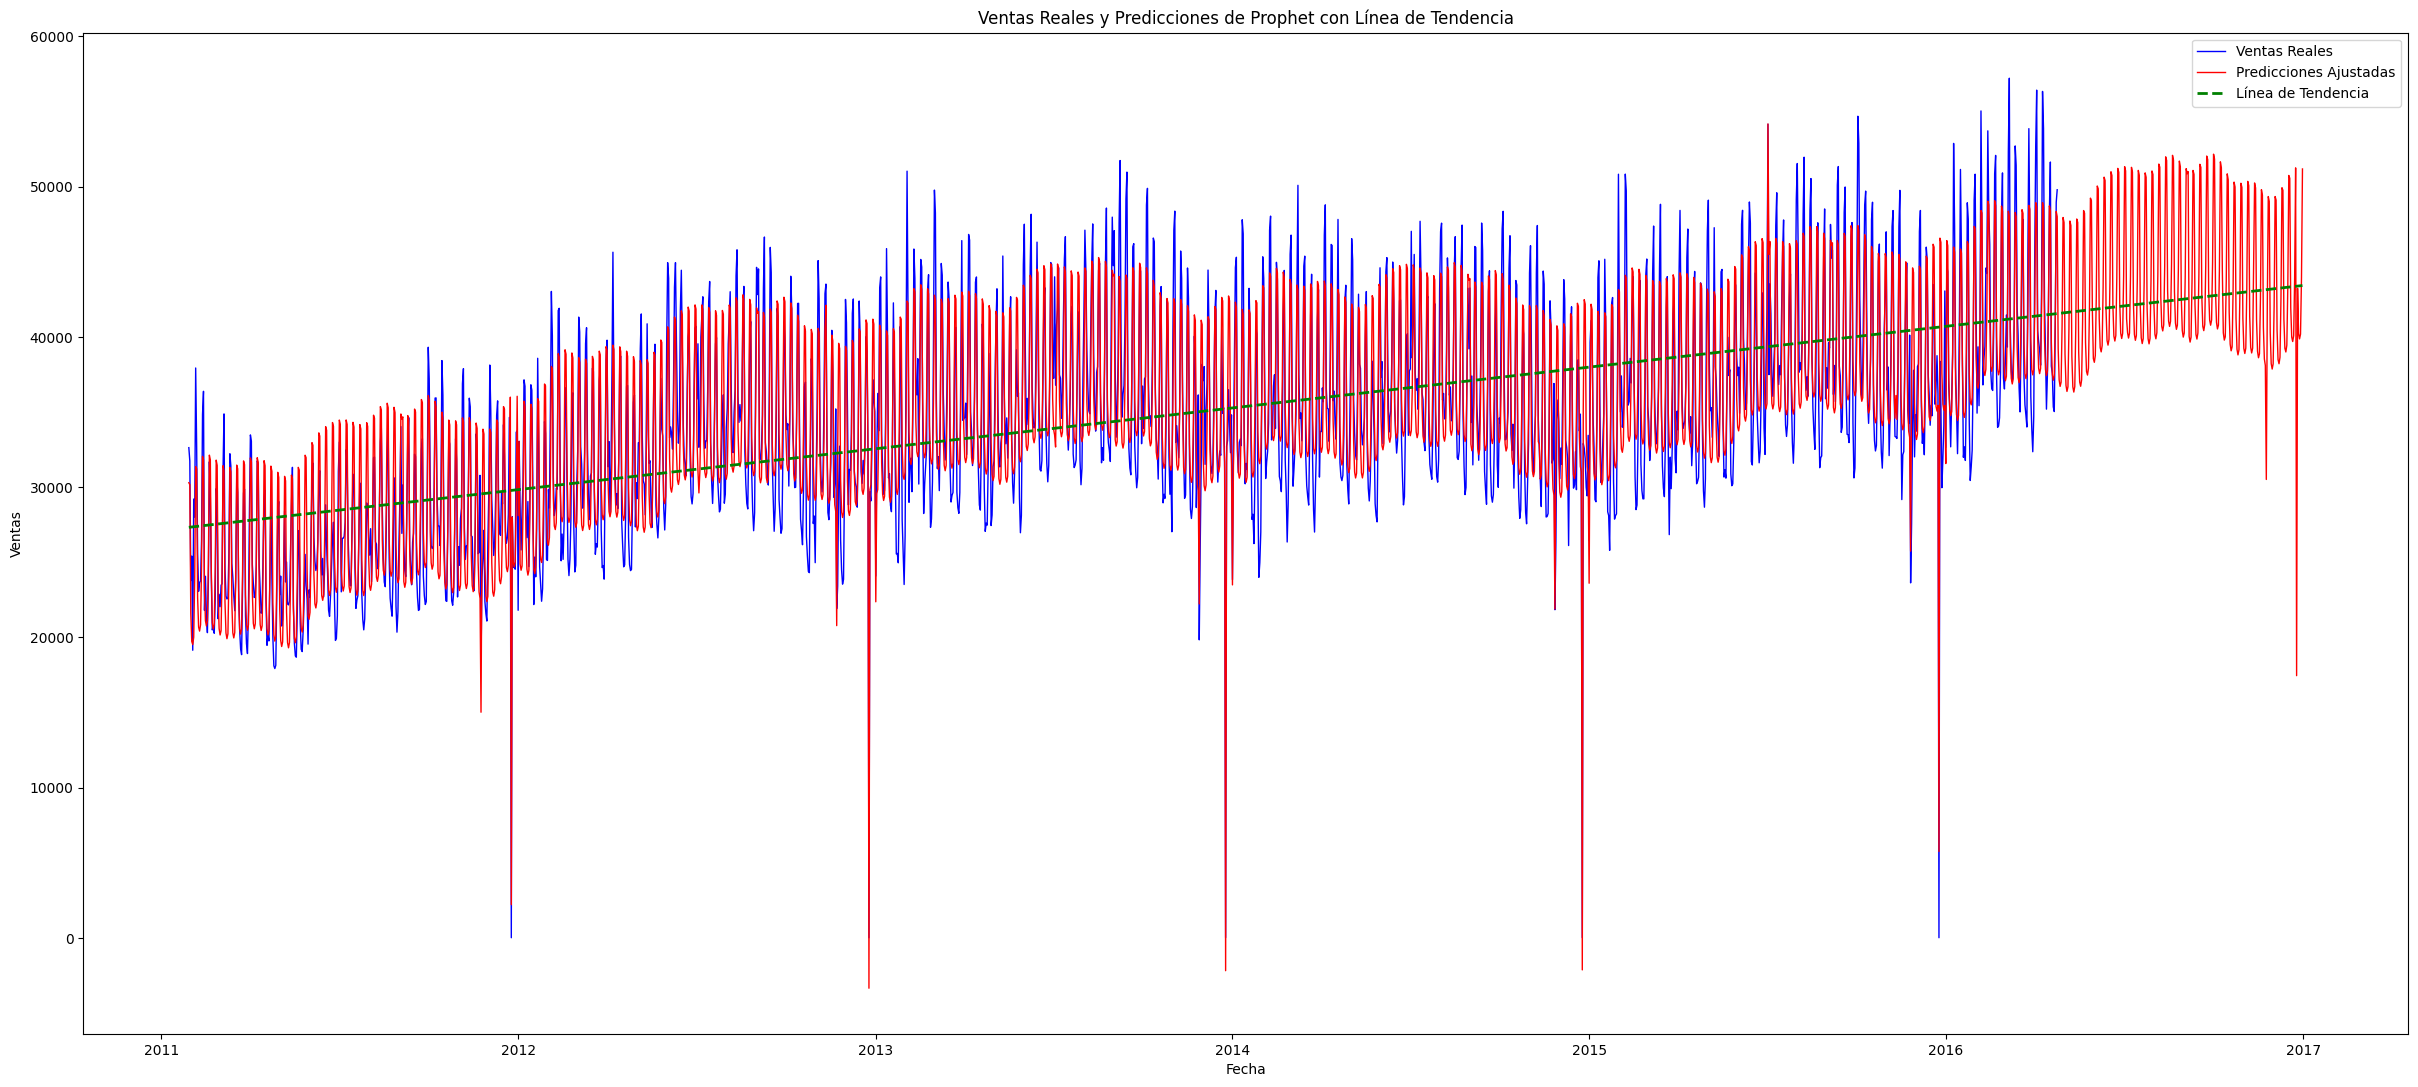

In [29]:
#Gráfico que me ayudará a ver las ventas reales, predicciones ajustadas y las futuras 

# Aqui defino el rango de fechas
start_date = '2011-01-01'
end_date = '2016-12-31'

filtered_df = combined_df[(combined_df['ds'] >= start_date) & (combined_df['ds'] <= end_date)]

# la línea de tendencia la creamos con la regresión lineal
model = LinearRegression()
model.fit(mdates.date2num(filtered_df['ds']).reshape(-1, 1), filtered_df['yhat'])
trend = model.predict(mdates.date2num(filtered_df['ds']).reshape(-1, 1))

# creamos el gráfico
plt.figure(figsize=(30, 13))
plt.plot(filtered_df['ds'], filtered_df['y'], label='Ventas Reales', color='blue', linestyle='-', linewidth=1)
plt.plot(filtered_df['ds'], filtered_df['yhat'], label='Predicciones Ajustadas', color='red', linestyle='-', linewidth=1)
plt.plot(filtered_df['ds'], trend, label='Línea de Tendencia', color='green', linestyle='--', linewidth=2)
plt.title('Ventas Reales y Predicciones de Prophet con Línea de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

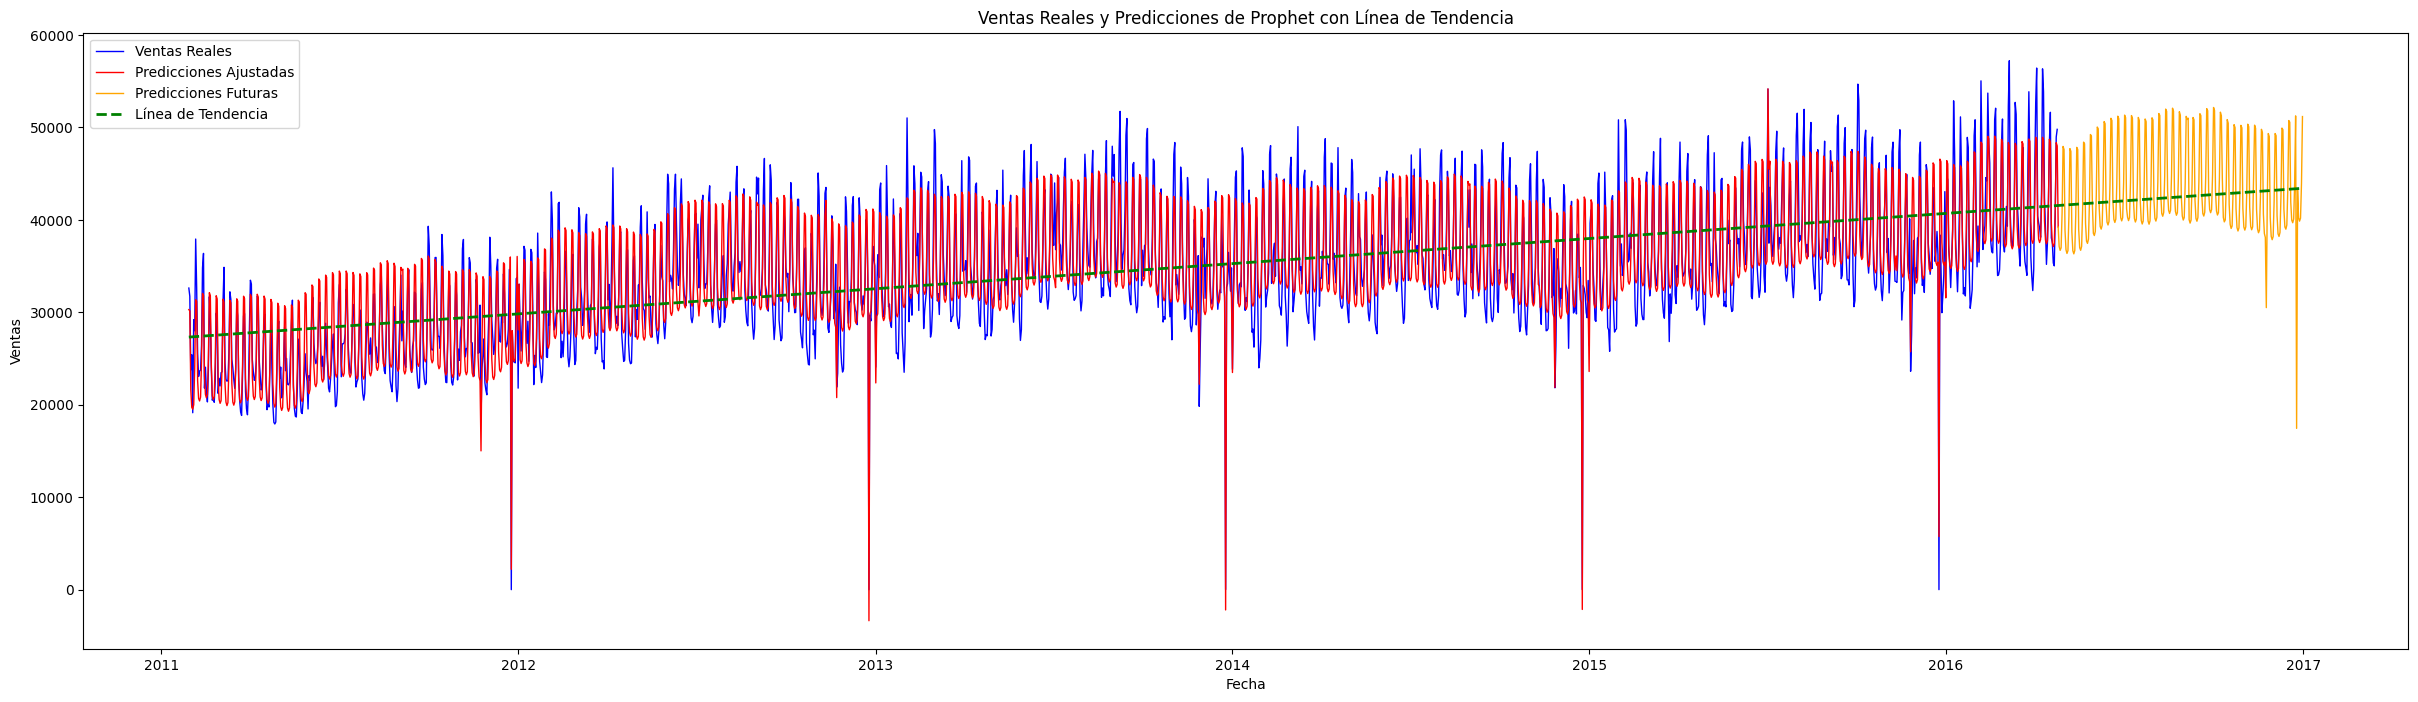

In [30]:
# Defino el rango con su corte que es el amarillo para visualizar las predicciones nuevas usando el mismo df
start_date = '2011-01-01'
end_date = '2016-12-31'
cutoff_date = '2016-04-25'

# Filtramos el df para el rango
filtered_df = combined_df[(combined_df['ds'] >= start_date) & (combined_df['ds'] <= end_date)]

# Separamos los datos en históricos y futuros basados en la fecha de corte
historical_data = filtered_df[filtered_df['ds'] <= cutoff_date]
future_data = filtered_df[filtered_df['ds'] >= cutoff_date]

# Preparamos los datos para la línea de tendencia usando regresión lineal en todo el rango filtrado
model = LinearRegression()
model.fit(mdates.date2num(filtered_df['ds']).reshape(-1, 1), filtered_df['yhat'])
trend = model.predict(mdates.date2num(filtered_df['ds']).reshape(-1, 1))

plt.figure(figsize=(30, 8))
plt.plot(filtered_df['ds'], filtered_df['y'], label='Ventas Reales', color='blue', linestyle='-', linewidth=1)
plt.plot(historical_data['ds'], historical_data['yhat'], label='Predicciones Ajustadas', color='red', linestyle='-', linewidth=1)
plt.plot(future_data['ds'], future_data['yhat'], label='Predicciones Futuras', color='orange', linestyle='-', linewidth=1)
plt.plot(filtered_df['ds'], trend, label='Línea de Tendencia', color='green', linestyle='--', linewidth=2)
plt.title('Ventas Reales y Predicciones de Prophet con Línea de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

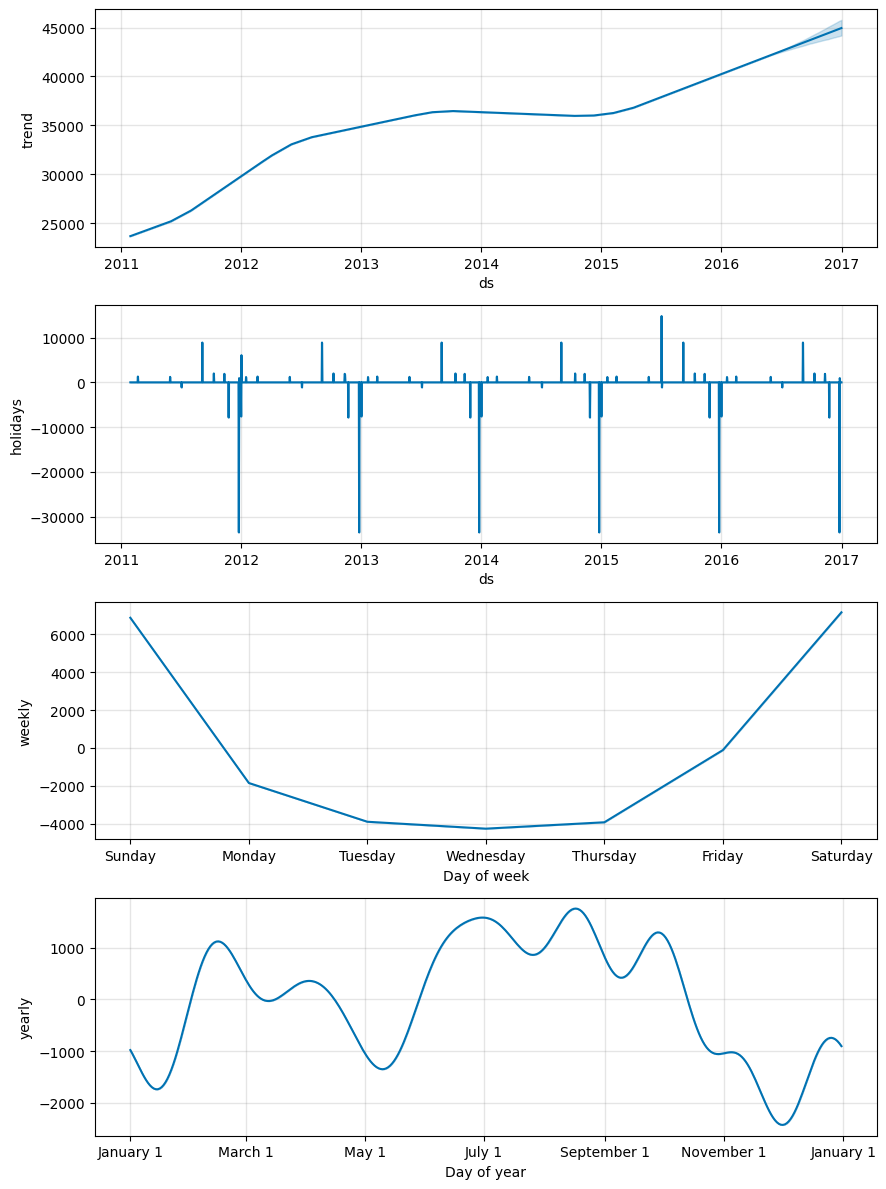

In [31]:
ig_1=prophet.plot_components(predic_dfprophet) 

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


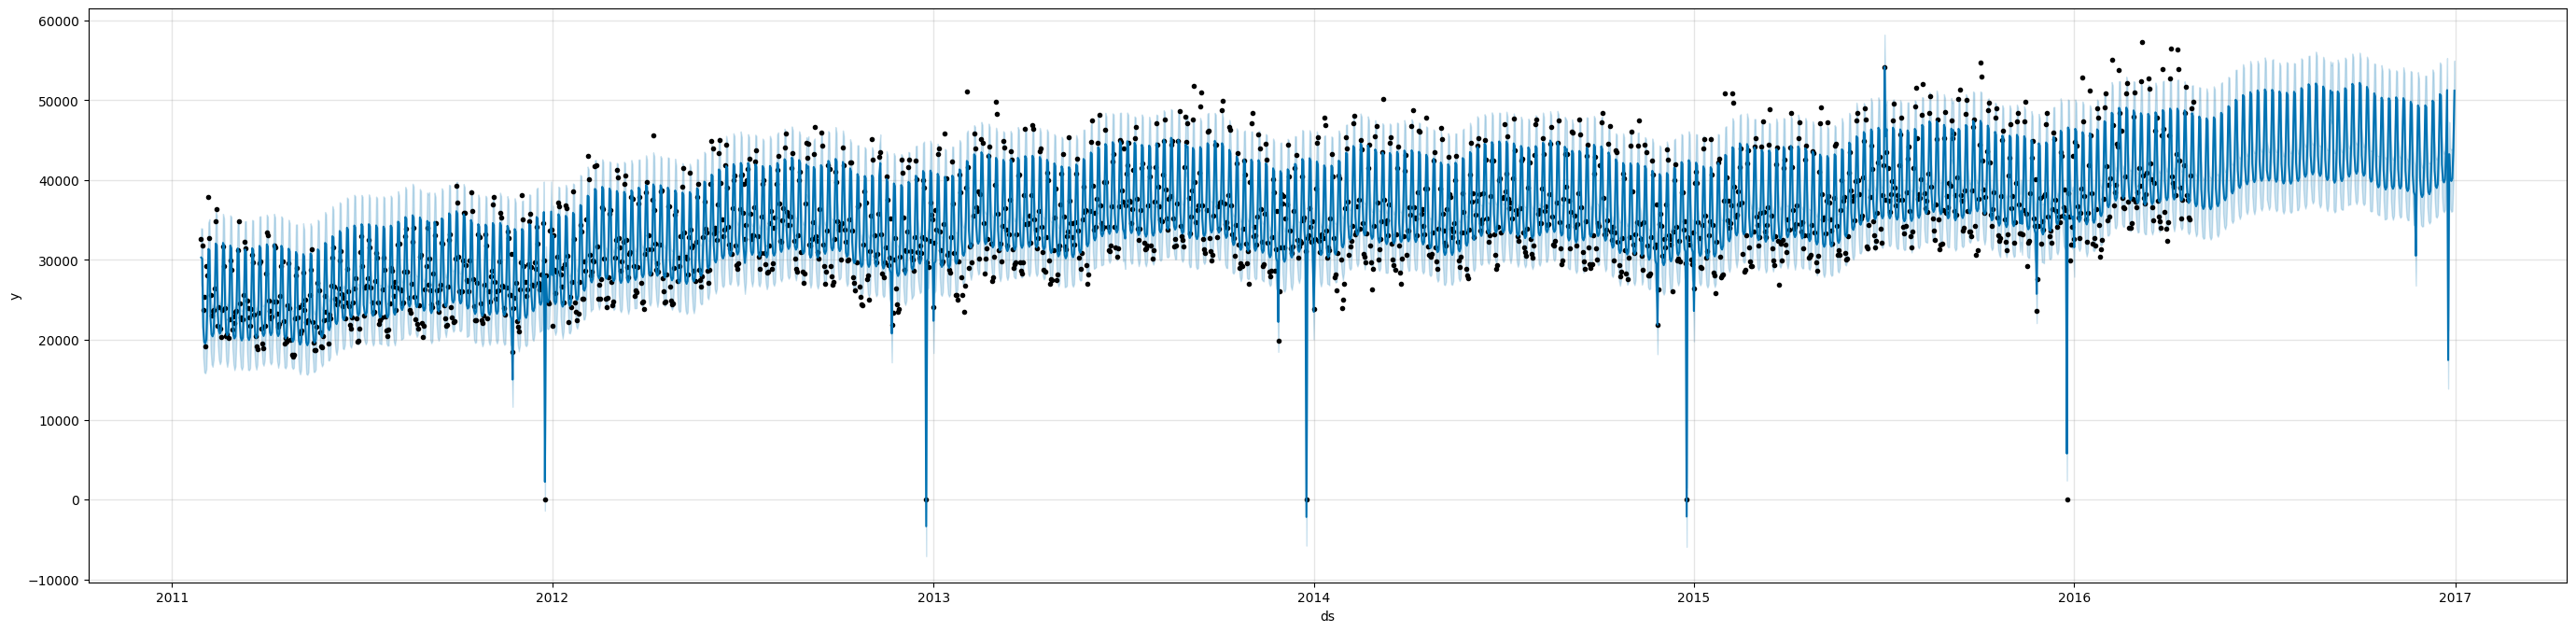

In [32]:
fig1 = prophet.plot(predic_dfprophet)
fig = plt.gcf()
fig.set_size_inches(30, 7)  # Ajusta el tamaño
plt.show()

EVALUAMOS EL MODELO

Si el valor promedio de mis ventas fuera por ejemplo, 20,000 con una desviación estándar de 5,000,
 entonces un RMSE de 2700 puede considerarse bueno, ya que está por debajo de la desviación estándar.

In [33]:
# Validación cruzada (Evaluaremos el modelo)
initial = '1460 days'  # Son casi 4 años de datos para entrenamiento inicial
period = '180 days'    # se evalua el modelo cada 6 meses
horizon = '251 days'   # Horizonte de predicción de aproximadamente 8 meses 
                       #que terminaría un 31 de diciembre del 2016 ya que mi prediccion empieza el 25 de abril de ese año
# se realiza la validación cruzada
df_cv = cross_validation(prophet, initial=initial, period=period, horizon=horizon)

# se calcula métricas de rendimiento, como el RMSE 
df_p = performance_metrics(df_cv)
rmse = df_p['rmse'].values[0]

# Mostramos el RMSE 
print("El RMSE es:" , rmse)

  0%|          | 0/2 [00:00<?, ?it/s]20:20:20 - cmdstanpy - INFO - Chain [1] start processing
20:20:20 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  3.28it/s]20:20:20 - cmdstanpy - INFO - Chain [1] start processing
20:20:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

El RMSE es: 2700.645939314932


-RMSE del modelo: 2,700.65

-Media de ventas reales: 34,341.56  (El RMSE es aproximadamente el 7.9% de la media de ventas)Esto implica que el error promedio de mis predicciones es menos del 8% del valor medio de las ventas, modelo positivo aunque podríamos mejorar 

-Desviación estándar de ventas reales: 7,345.91 (El RMSE es aproximadamente el 37% de la desviación estándar)si un modelo tiene un RMSE que es menos de la mitad de la desviación estándar, se considera un buen ajuste, porque significa que el modelo está capturando bien la variabilidad de los datos

En la práctica, un RMSE más bajo que la desviación estándar indica que el  modelo es "bastante" preciso en términos de la magnitud de los errores de predicción. Además, un RMSE que es una pequeña fracción de la media indica que en promedio, las predicciones del modelo están bastante cercanas a los valores reales.


In [34]:
media_ventas_reales = prophet_dfts['y'].mean()
print(f"La media de ventas reales es: {media_ventas_reales}")

desviacion_estandar_ventas_reales = prophet_dfts['y'].std()
print(f"La desviación estándar de las ventas reales es: {desviacion_estandar_ventas_reales}")

La media de ventas reales es: 34341.562467328804
La desviación estándar de las ventas reales es: 7345.905196022218


In [35]:
# calcularé el RMSE como porcentaje de la media de ventas reales y desviación estandar
rmse = 2700.645939314932
media_ventas_reales = 34341.562467328804
# Calculamos el RMSE como porcentaje de la media de ventas reales
rmse_porcentaje_media = (rmse / media_ventas_reales) * 100
# Convertimos el número a string con str()
print("El RMSE como porcentaje de la media de ventas reales es: " + str(round(rmse_porcentaje_media, 2)) + "%")
# el RMSE como porcentaje de la desviación estandar de las ventas reales
rmse = 2700.645939314932
desviacion_estandar_ventas_reales = 7345.905196022218
rmse_porcentaje_desviacion_estandar = (rmse / desviacion_estandar_ventas_reales) * 100
print("El RMSE como porcentaje de la desviación estándar de las ventas reales es: {:.2f}%".format(rmse_porcentaje_desviacion_estandar))


El RMSE como porcentaje de la media de ventas reales es: 7.86%
El RMSE como porcentaje de la desviación estándar de las ventas reales es: 36.76%


GUARDAMOS EL MODELO

In [36]:
#guardamos el modelo 
ruta_archivo = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\Usar_forecasting_correcto\forcasting_day\usar\model_tfm\prophet_model.pkl'

# Guardar el modelo en un archivo utilizando pickle
with open(ruta_archivo, 'wb') as f:
    pickle.dump(prophet, f)

print(f'Modelo guardado correctamente en {ruta_archivo}')

Modelo guardado correctamente en C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\Usar_forecasting_correcto\forcasting_day\usar\model_tfm\prophet_model.pkl


In [37]:
combined_df_sinna=combined_df.copy()

In [38]:
combined_df_sinna['y'] = combined_df_sinna['y'].fillna(0)
combined_df_sinna

,ds,y,yhat
0,2011-01-29,32631.0,30296.620120
1,2011-01-30,31749.0,30169.242748
2,2011-01-31,23783.0,21617.234772
3,2011-02-01,25412.0,19733.333289
4,2011-02-02,19146.0,19525.610981
...,...,...,...
2159,2016-12-27,0.0,40245.350088
2160,2016-12-28,0.0,39869.428914
2161,2016-12-29,0.0,40183.157355
2162,2016-12-30,0.0,43956.894610


In [39]:
# Calculamos la diferencia entre "yhat" y "y"
combined_df_sinna['error/diferencia'] = combined_df_sinna['yhat'] - combined_df_sinna['y']

# ahora el porcentaje de diferencia
combined_df_sinna['error_porcentual'] = (combined_df_sinna['error/diferencia'] / combined_df_sinna['y']) * 100
combined_df_sinna

,ds,y,yhat,error/diferencia,error_porcentual
0,2011-01-29,32631.0,30296.620120,-2334.379880,-7.153872
1,2011-01-30,31749.0,30169.242748,-1579.757252,-4.975770
2,2011-01-31,23783.0,21617.234772,-2165.765228,-9.106358
3,2011-02-01,25412.0,19733.333289,-5678.666711,-22.346398
4,2011-02-02,19146.0,19525.610981,379.610981,1.982717
...,...,...,...,...,...
2159,2016-12-27,0.0,40245.350088,40245.350088,inf
2160,2016-12-28,0.0,39869.428914,39869.428914,inf
2161,2016-12-29,0.0,40183.157355,40183.157355,inf
2162,2016-12-30,0.0,43956.894610,43956.894610,inf


In [40]:
predic_dfprophet1=predic_dfprophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] #lo mismo que arriba pero con las columnas importantes 

In [41]:
# Filtramos las fechas dentro del rango deseado por si quiero analizarlo de esta manera
filtro_fechas = (predic_dfprophet1['ds'] >= '2016-04-01') & (predic_dfprophet1['ds'] <= '2016-04-24')
df_filtrado = predic_dfprophet1.loc[filtro_fechas]
df_filtrado.tail(6)

,ds,yhat,yhat_lower,yhat_upper
1907,2016-04-19,37534.125692,33501.487000,40959.923285
1908,2016-04-20,37116.627226,33217.333618,40592.209819
1909,2016-04-21,37397.687574,33538.234551,40974.400668
1910,2016-04-22,41147.084088,37289.282021,44945.574900
1911,2016-04-23,48352.109634,44517.186250,51811.196554
1912,2016-04-24,48005.470785,44252.104388,51856.212669


# 2 DF con VENTAS SEMANALES para modelos

In [42]:
df

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,2011-02-06,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,2011-02-06,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,2011-02-06,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027952,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,1,2016-05-01,3.5760,2016-04-24,Sunday,Weekend
46027953,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,2016-05-01,2.9760,2016-04-24,Sunday,Weekend
46027954,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,2016-05-01,4.7760,2016-04-24,Sunday,Weekend
46027955,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,3,2016-05-01,1.5360,2016-04-24,Sunday,Weekend


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   item        object        
 2   category    object        
 3   department  object        
 4   store       object        
 5   store_code  object        
 6   d           object        
 7   sales       int64         
 8   yearweek    datetime64[ns]
 9   sell_price  float64       
 10  date        datetime64[ns]
 11  weekday     object        
 12  event       object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 4.5+ GB


In [44]:
df_week1=df

In [45]:
# borramos 201617.0/2016-05-01 porque es una semana incompleta por solo tener un sábado y domingo, es la última semana (23 y 24 de abril)
df_week = df_week1[df_week1['yearweek'] != "2016-05-01"]
df_week

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,2011-02-06,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,2011-02-06,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,2011-02-06,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45966972,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,3.5760,2016-04-22,Friday,Laboral Day
45966973,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,2.9760,2016-04-22,Friday,Laboral Day
45966974,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,4.7760,2016-04-22,Friday,Laboral Day
45966975,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,3,2016-04-24,1.5360,2016-04-22,Friday,Laboral Day


In [46]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45966977 entries, 0 to 45966976
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   item        object        
 2   category    object        
 3   department  object        
 4   store       object        
 5   store_code  object        
 6   d           object        
 7   sales       int64         
 8   yearweek    datetime64[ns]
 9   sell_price  float64       
 10  date        datetime64[ns]
 11  weekday     object        
 12  event       object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 4.8+ GB


In [47]:
df_week["yearweek"].nunique()

273

In [48]:
# VENTAS SEMANALES
ts_dfm_week = df_week.groupby("yearweek")['sales'].sum().reset_index() #dataframe necesario para probar con modelo prophet y holt winters
ts_dfm_week

,yearweek,sales
0,2011-02-06,189942
1,2011-02-13,193170
2,2011-02-20,182569
3,2011-02-27,169002
4,2011-03-06,171820
...,...,...
268,2016-03-27,281241
269,2016-04-03,282697
270,2016-04-10,309668
271,2016-04-17,306203


In [49]:
filas_con_valor_cerots_w = ts_dfm_week[ts_dfm_week['sales'] == 0]
filas_con_valor_cerots_w


,yearweek,sales


##  2.1 Modelo Holt Winters con Ventas semanales
Holt-Winters es un modelo de suavizado exponencial para el pronóstico de series temporales, pero no se clasifica típicamente como un modelo de aprendizaje automático (machine learning) como la regresión lineal, los árboles de decisión o las redes neuronales.

In [50]:
hw_dfts_week=ts_dfm_week.copy()
#nuevamente usar este df
hw_dfts_week #yearweek(ds) debe estar como datetime

,yearweek,sales
0,2011-02-06,189942
1,2011-02-13,193170
2,2011-02-20,182569
3,2011-02-27,169002
4,2011-03-06,171820
...,...,...
268,2016-03-27,281241
269,2016-04-03,282697
270,2016-04-10,309668
271,2016-04-17,306203


In [51]:
hw_dfts_week = hw_dfts_week.rename(columns={'yearweek': 'ds', 'sales': 'y'})


In [52]:
hw_dfts_week['ds'] = pd.to_datetime(hw_dfts_week['ds'])
hw_dfts_week.set_index('ds', inplace=True)
hw_dfts_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2011-02-06 to 2016-04-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       273 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


In [53]:
#ajustamos el modelo holt winters (instalar librerias)
modelhw_weeek = sm.tsa.ExponentialSmoothing(hw_dfts_week['y'], seasonal='add', seasonal_periods=52)  # Estacionalidad aditiva con periodo anual (52 semanas)
fitted_model_hwweek = modelhw_weeek.fit()
# aqui obtenemos las predicciones ajustadas o de los históricos
predicciones_ajustadas_hwweek = fitted_model_hwweek.fittedvalues
predicciones_ajustadas_hwweek

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ds
2011-02-06    165915.731823
2011-02-13    203088.270036
2011-02-20    208798.204462
2011-02-27    172158.598240
2011-03-06    167389.810663
                  ...      
2016-03-27    280036.205579
2016-04-03    303436.723568
2016-04-10    300731.342744
2016-04-17    290747.497240
2016-04-24    280219.165491
Length: 273, dtype: float64

In [54]:
#Genera predicciones para las siguientes 12 semanas (o las semanas deseadas):
predicciones_hw1 = fitted_model_hwweek.forecast(steps=12) #función forecast(steps=12) predice valores para el número especificado de pasos futuros, en este caso 12 semanas siguientes
predicciones_hw1


2016-05-01    291729.425251
2016-05-08    308379.858627
2016-05-15    300809.207776
2016-05-22    290698.482984
2016-05-29    283508.130596
2016-06-05    319816.789762
2016-06-12    326045.002831
2016-06-19    310088.798063
2016-06-26    296117.870078
2016-07-03    328435.941551
2016-07-10    319300.061005
2016-07-17    316637.511367
Freq: W-SUN, dtype: float64

#guardamos modelo
ruta_modelo_fww = 'C:\\Users\\pazcr\\OneDrive\\Escritorio\\TFM\\Grupo TFM\\forcastingclustmABRI\\Usar_forecasting_correcto\\forcasting_day\\usar\\model_tfm\\mod_holt_winters_weekgl.pkl'


with open(ruta_modelo_fww, 'wb') as file:
    pickle.dump(fitted_model_hwweek, file)

Unimos los df para visualizar mejor las predicciones y ventas reales

In [55]:
# Creamos un DataFrame para las predicciones ajustadas 
df_predicciones_ajustadas = pd.DataFrame({
    'ds': hw_dfts_week.index,
    'yhat': predicciones_ajustadas_hwweek
})
df_predicciones_ajustadas

,ds,yhat
ds,,
2011-02-06,2011-02-06,165915.731823
2011-02-13,2011-02-13,203088.270036
2011-02-20,2011-02-20,208798.204462
2011-02-27,2011-02-27,172158.598240
2011-03-06,2011-03-06,167389.810663
...,...,...
2016-03-27,2016-03-27,280036.205579
2016-04-03,2016-04-03,303436.723568
2016-04-10,2016-04-10,300731.342744


In [56]:

last_date = hw_dfts_week.index.max()

# Creamos las fechas correspondientes 
# hacemos lo siguien si el df es formato semanal 
future_dates = pd.date_range(start=last_date, periods=13, freq='W')[1:]  # El [1:] es para excluir la última fecha de los datos históricos

# Creamos un df para las predicciones futuras con sus fechas
df_predicciones_futuras = pd.DataFrame({
    'ds': future_dates,
    'yhat': predicciones_hw1
})
df_predicciones_futuras


,ds,yhat
2016-05-01,2016-05-01,291729.425251
2016-05-08,2016-05-08,308379.858627
2016-05-15,2016-05-15,300809.207776
2016-05-22,2016-05-22,290698.482984
2016-05-29,2016-05-29,283508.130596
2016-06-05,2016-06-05,319816.789762
2016-06-12,2016-06-12,326045.002831
2016-06-19,2016-06-19,310088.798063
2016-06-26,2016-06-26,296117.870078
2016-07-03,2016-07-03,328435.941551


In [57]:
dfhw_weekcompleto = pd.concat([df_predicciones_ajustadas, df_predicciones_futuras])

In [58]:
# Restablecemos el índice del dataFrame para que no hayan dos columnas de fechas
dfhw_weekcompleto.reset_index(drop=True, inplace=True) #df con las predicciones ajustadas y futuras 
hw_dfts_week.reset_index('ds', inplace=True) #df original de las ventas semanales
dfhw_weekcompleto.head(2)

,ds,yhat
0,2011-02-06,165915.731823
1,2011-02-13,203088.270036


df que usaremos para el gráfico(dfhw_weekmerge )

In [59]:
dfhw_weekmerge = pd.merge(dfhw_weekcompleto, hw_dfts_week, on='ds', how='left')
dfhw_weekmerge 

,ds,yhat,y
0,2011-02-06,165915.731823,189942.0
1,2011-02-13,203088.270036,193170.0
2,2011-02-20,208798.204462,182569.0
3,2011-02-27,172158.598240,169002.0
4,2011-03-06,167389.810663,171820.0
...,...,...,...
280,2016-06-19,310088.798063,NaN
281,2016-06-26,296117.870078,NaN
282,2016-07-03,328435.941551,NaN
283,2016-07-10,319300.061005,NaN


In [60]:
dfhw_weekmerge["ds"].unique()

<DatetimeArray>
['2011-02-06 00:00:00', '2011-02-13 00:00:00', '2011-02-20 00:00:00',
 '2011-02-27 00:00:00', '2011-03-06 00:00:00', '2011-03-13 00:00:00',
 '2011-03-20 00:00:00', '2011-03-27 00:00:00', '2011-04-03 00:00:00',
 '2011-04-10 00:00:00',
 ...
 '2016-05-15 00:00:00', '2016-05-22 00:00:00', '2016-05-29 00:00:00',
 '2016-06-05 00:00:00', '2016-06-12 00:00:00', '2016-06-19 00:00:00',
 '2016-06-26 00:00:00', '2016-07-03 00:00:00', '2016-07-10 00:00:00',
 '2016-07-17 00:00:00']
Length: 285, dtype: datetime64[ns]

In [61]:
dfhw_weekmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      285 non-null    datetime64[ns]
 1   yhat    285 non-null    float64       
 2   y       273 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.8 KB


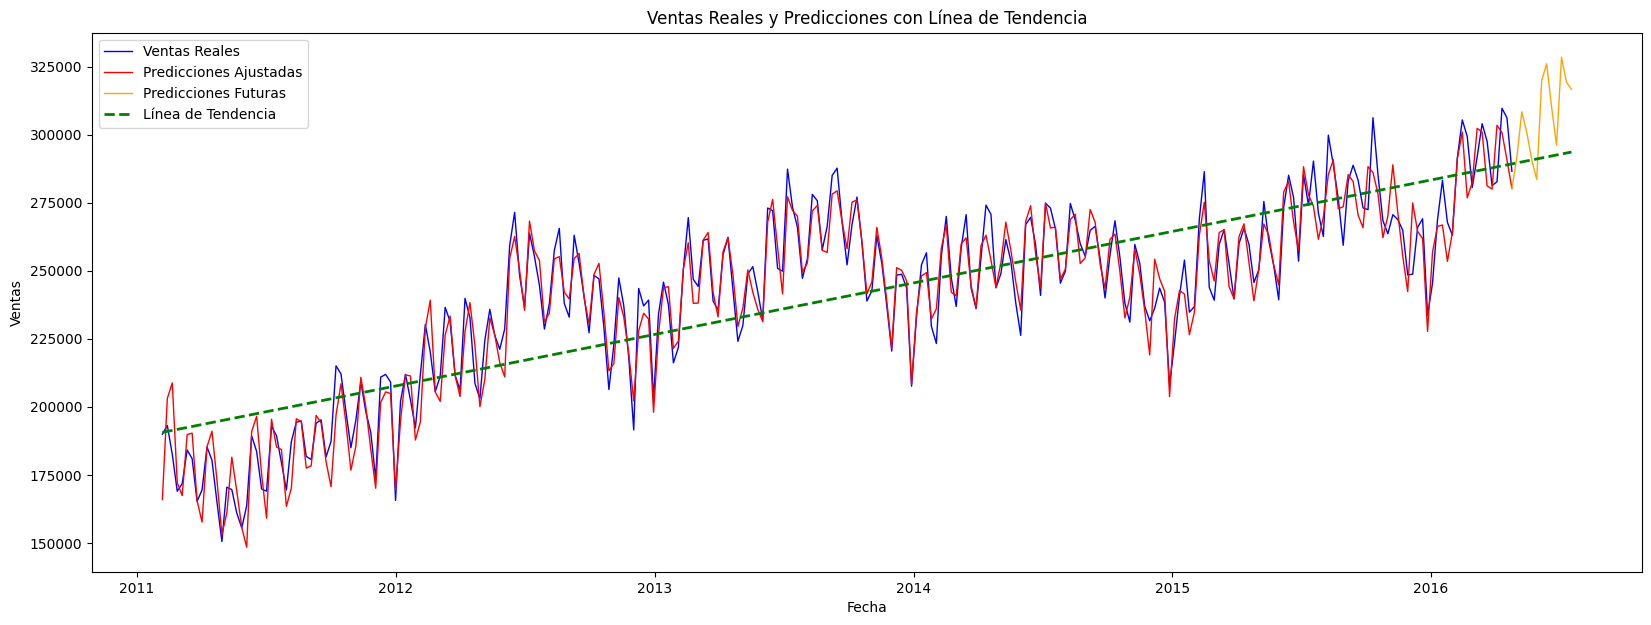

In [62]:
# Defino un rango de fechas que deseas visualizarlo mejor
start_date = '2011-01-01'
end_date = '2016-07-17' # semanas posteriores a la última fecha de ventas reales, podemos poner el rango que queramos
cutoff_date = '2016-04-24' # el amarillo es la fecha de corte para las predicciones futuras

# Filtramos el df para este rango
filtered_df = dfhw_weekmerge[(dfhw_weekmerge['ds'] >= start_date) & (dfhw_weekmerge['ds'] <= end_date)]

# Separamos los datos en históricos y futuros basados en la fecha de corte
historical_data = filtered_df[filtered_df['ds'] <= cutoff_date]
future_data = filtered_df[filtered_df['ds'] >= cutoff_date]

# Preparamos los datos para la línea de tendencia usando regresión lineal en todo el rango filtrado
model = LinearRegression() #importamos la libreria al inicio
model.fit(pd.to_datetime(filtered_df['ds']).astype('int64').values.reshape(-1, 1), filtered_df['yhat'])
trend = model.predict(pd.to_datetime(filtered_df['ds']).astype('int64').values.reshape(-1, 1))

# creamos el gráfico
plt.figure(figsize=(20, 7))
plt.plot(filtered_df['ds'], filtered_df['y'], label='Ventas Reales', color='blue', linestyle='-', linewidth=1)
plt.plot(historical_data['ds'], historical_data['yhat'], label='Predicciones Ajustadas', color='red', linestyle='-', linewidth=1)
plt.plot(future_data['ds'], future_data['yhat'], label='Predicciones Futuras', color='orange', linestyle='-', linewidth=1)
plt.plot(filtered_df['ds'], trend, label='Línea de Tendencia', color='green', linestyle='--', linewidth=2)
plt.title('Ventas Reales y Predicciones con Línea de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

RMSE

In [63]:
#RMSE
dfhw_weekmerge

,ds,yhat,y
0,2011-02-06,165915.731823,189942.0
1,2011-02-13,203088.270036,193170.0
2,2011-02-20,208798.204462,182569.0
3,2011-02-27,172158.598240,169002.0
4,2011-03-06,167389.810663,171820.0
...,...,...,...
280,2016-06-19,310088.798063,NaN
281,2016-06-26,296117.870078,NaN
282,2016-07-03,328435.941551,NaN
283,2016-07-10,319300.061005,NaN


In [64]:
df_filtered = dfhw_weekmerge.dropna(subset=['y', 'yhat']) 
df_filtered

,ds,yhat,y
0,2011-02-06,165915.731823,189942.0
1,2011-02-13,203088.270036,193170.0
2,2011-02-20,208798.204462,182569.0
3,2011-02-27,172158.598240,169002.0
4,2011-03-06,167389.810663,171820.0
...,...,...,...
268,2016-03-27,280036.205579,281241.0
269,2016-04-03,303436.723568,282697.0
270,2016-04-10,300731.342744,309668.0
271,2016-04-17,290747.497240,306203.0


In [65]:
mse = mean_squared_error(df_filtered['y'], df_filtered['yhat'])
mse

62562971.61805186

In [66]:
rmse = np.sqrt(mse)
rmse

7909.675822563897

In [67]:
promedio_ventas = dfhw_weekmerge['y'].mean()
promedio_ventas

240280.77655677655

In [68]:
# Calculamos la relación entre RMSE y el promedio de ventas
relacion_rmse_promedio = rmse / promedio_ventas
print(relacion_rmse_promedio)
# Convertimos a porcentaje
relacion_porcentaje = relacion_rmse_promedio * 100
print(relacion_porcentaje)

0.032918471198193834
3.2918471198193835


In [69]:
print("La relación RMSE con el promedio de ventas es:", round(relacion_porcentaje, 2), "%")


La relación RMSE con el promedio de ventas es: 3.29 %


## 3 Función para obtener 25 productos (Week)
Artículos más vendidos por categoría (10 de Accesories, 10 de Supermarket y 5 de Home and Garden)



In [70]:
df

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,2011-02-06,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,2011-02-06,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,2011-02-06,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027952,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,1,2016-05-01,3.5760,2016-04-24,Sunday,Weekend
46027953,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,2016-05-01,2.9760,2016-04-24,Sunday,Weekend
46027954,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,0,2016-05-01,4.7760,2016-04-24,Sunday,Weekend
46027955,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1913,3,2016-05-01,1.5360,2016-04-24,Sunday,Weekend


In [71]:
def process_sales_data(df):

    df['yearweek'] = df['yearweek'].astype(str)

    weekly_sales = df.groupby(['item', 'yearweek'])['sales'].sum().reset_index(name='weekly_sales')
    df = df.merge(weekly_sales, on=['item', 'yearweek'], how='left')

    df['date'] = pd.to_datetime(df['date'])

    total_sales_per_item = df.groupby(['item', 'category'])['sales'].sum().reset_index()

    top_items_list = []
    for category in total_sales_per_item['category'].unique():
        top_items = total_sales_per_item[total_sales_per_item['category'] == category].nlargest(10, 'sales')
        top_items_list.append(top_items)

    top_items_df = pd.concat(top_items_list)

    top_items_names = top_items_df['item'].unique()

    top_items_timeseries = df[df['item'].isin(top_items_names)]
    top_items_timeseries.set_index('date', inplace=True)

    weekly_sales = top_items_timeseries.groupby(['item']).resample('W')['sales'].sum()
    weekly_sales = weekly_sales.reset_index()
    #weekly_sales = weekly_sales[weekly_sales['sales'] != 0] #borra semanas que no hay ventas pero lo dejamos para que el modelo sepa las semanas que no hubieron ventas

    return weekly_sales


In [72]:
df['item'].value_counts()

item
SUPERMARKET_2_276      19130
SUPERMARKET_3_326      19130
HOME_&_GARDEN_2_368    19130
HOME_&_GARDEN_1_197    19130
HOME_&_GARDEN_1_196    19130
                       ...  
HOME_&_GARDEN_1_308     3884
HOME_&_GARDEN_1_159     3751
HOME_&_GARDEN_1_242     3590
SUPERMARKET_3_296       3534
SUPERMARKET_2_379       3100
Name: count, Length: 3049, dtype: int64

In [73]:
df['item'].nunique()

3049

In [74]:
df['yearweek'].nunique() 

274

In [75]:
df2 = process_sales_data(df)

In [76]:
df2

,item,date,sales
0,ACCESORIES_1_008,2011-01-30,123
1,ACCESORIES_1_008,2011-02-06,424
2,ACCESORIES_1_008,2011-02-13,345
3,ACCESORIES_1_008,2011-02-20,292
4,ACCESORIES_1_008,2011-02-27,262
...,...,...,...
7927,SUPERMARKET_3_723,2016-03-27,1499
7928,SUPERMARKET_3_723,2016-04-03,1208
7929,SUPERMARKET_3_723,2016-04-10,1345
7930,SUPERMARKET_3_723,2016-04-17,1309


In [77]:
df2.isnull().sum()

item     0
date     0
sales    0
dtype: int64

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   item    7932 non-null   object        
 1   date    7932 non-null   datetime64[ns]
 2   sales   7932 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 186.0+ KB


In [79]:
itemuni=df2["item"].nunique() 
print(itemuni)
dateuni=df2["date"].nunique() 
print(dateuni)
salesuni=df2["sales"].nunique()
print(salesuni)

30
274
2379


## 3.1 Modelo Holt Winters para 25 productos (Week) 

In [80]:
df26hww=df2.copy()
df26hww

,item,date,sales
0,ACCESORIES_1_008,2011-01-30,123
1,ACCESORIES_1_008,2011-02-06,424
2,ACCESORIES_1_008,2011-02-13,345
3,ACCESORIES_1_008,2011-02-20,292
4,ACCESORIES_1_008,2011-02-27,262
...,...,...,...
7927,SUPERMARKET_3_723,2016-03-27,1499
7928,SUPERMARKET_3_723,2016-04-03,1208
7929,SUPERMARKET_3_723,2016-04-10,1345
7930,SUPERMARKET_3_723,2016-04-17,1309


In [81]:
#borramos los productos deseados
items_to_remove = ["HOME_&_GARDEN_1_019", "HOME_&_GARDEN_1_083", 
                   "HOME_&_GARDEN_1_110", "HOME_&_GARDEN_1_334", 
                   "HOME_&_GARDEN_1_459"]

df26hww = df26hww[~df26hww['item'].isin(items_to_remove)]

In [82]:
df26hww

,item,date,sales
0,ACCESORIES_1_008,2011-01-30,123
1,ACCESORIES_1_008,2011-02-06,424
2,ACCESORIES_1_008,2011-02-13,345
3,ACCESORIES_1_008,2011-02-20,292
4,ACCESORIES_1_008,2011-02-27,262
...,...,...,...
7927,SUPERMARKET_3_723,2016-03-27,1499
7928,SUPERMARKET_3_723,2016-04-03,1208
7929,SUPERMARKET_3_723,2016-04-10,1345
7930,SUPERMARKET_3_723,2016-04-17,1309


In [83]:
unique_items_hw = df26hww['item'].unique()
 
# Diccionario para almacenar los modelos, predicciones y datos reales de cada ítem para Holt-Winters.
item_models_hw = {}

for item in unique_items_hw:
    item_df_hw = df26hww[df26hww['item'] == item][['date', 'sales']].copy()
    item_df_hw.set_index('date', inplace=True)

    # Inicializa y ajusta el modelo de Holt-Winters.
    model_hw = ExponentialSmoothing(item_df_hw['sales'], seasonal='add', seasonal_periods=52).fit()

    # Hace predicciones para el periodo histórico más 4 semanas adicionales en el futuro (o las semanas que deseemos)
    forecast_hw = model_hw.forecast(4)

    # Las predicciones se unen con las ventas reales para el periodo histórico en un nuevo DataFrame.
    combined_hw = item_df_hw.copy()
    combined_hw['yhat_hw'] = model_hw.fittedvalues
    forecast_dates = pd.date_range(item_df_hw.index[-1] + pd.Timedelta(weeks=1), periods=4, freq='W-SUN')
    combined_hw = combined_hw.reindex(combined_hw.index.union(forecast_dates))
    combined_hw.loc[forecast_dates, 'yhat_hw'] = forecast_hw.values

    # Almacena el modelo y la combinación de predicciones y ventas reales en el diccionario.
    item_models_hw[item] = {
        'model_hw': model_hw,
        'forecast_hw': combined_hw[['yhat_hw']]  # Incluye las predicciones.
    }

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python

In [84]:
forecast_hw

2016-05-01    1315.137602
2016-05-08    1279.597900
2016-05-15     910.152944
2016-05-22     778.647094
Freq: W-SUN, dtype: float64

In [85]:
all_combined_forecasts_hw = []
 
# En este bucle for itera sobre el diccionario de modelos de Holt-Winters para recopilar las predicciones y ventas reales
for item, details in item_models_hw.items():
    forecast_hw_with_reals = details['forecast_hw'].copy()  
    # Obtiene las ventas reales y aseguramos que el índice esté en el mismo formato
    sales_real_hw = df26hww[df26hww['item'] == item][['date', 'sales']].set_index('date').reindex(forecast_hw_with_reals.index, fill_value=np.nan)
    # Combina las predicciones con las ventas reales
    forecast_hw_with_reals[f'y_{item}'] = sales_real_hw['sales']
    # Renombra la columna de predicciones para identificarlas por producto
    forecast_hw_with_reals.rename(columns={'yhat_hw': f'yhat_hw_{item}'}, inplace=True)
    # Añade el df a la lista
    all_combined_forecasts_hw.append(forecast_hw_with_reals)

# Combina todos los dataFrames de la lista en uno solo, uniendo por la columna de índice 'date'
final_combined_forecast_hw = pd.concat(all_combined_forecasts_hw, axis=1)

# Vemos el DataFrame combinado
final_combined_forecast_hw

,yhat_hw_ACCESORIES_1_008,y_ACCESORIES_1_008,yhat_hw_ACCESORIES_1_015,y_ACCESORIES_1_015,yhat_hw_ACCESORIES_1_178,y_ACCESORIES_1_178,yhat_hw_ACCESORIES_1_254,y_ACCESORIES_1_254,yhat_hw_ACCESORIES_1_256,y_ACCESORIES_1_256,...,yhat_hw_SUPERMARKET_3_586,y_SUPERMARKET_3_586,yhat_hw_SUPERMARKET_3_587,y_SUPERMARKET_3_587,yhat_hw_SUPERMARKET_3_694,y_SUPERMARKET_3_694,yhat_hw_SUPERMARKET_3_714,y_SUPERMARKET_3_714,yhat_hw_SUPERMARKET_3_723,y_SUPERMARKET_3_723
2011-01-30,338.624081,123.0,338.182979,133.0,347.027902,105.0,290.164652,152.0,353.106489,258.0,...,2331.882326,995.0,1600.706308,651.0,941.587752,521.0,879.400128,453.0,672.365221,575.0
2011-02-06,351.124474,424.0,231.693295,211.0,308.753858,378.0,339.169649,469.0,424.404978,551.0,...,2545.510288,3019.0,1134.165357,2233.0,1085.894346,1587.0,962.237044,1185.0,1039.487642,1980.0
2011-02-13,356.687672,345.0,265.801275,357.0,259.783881,298.0,376.058809,549.0,404.633594,525.0,...,3036.655623,3533.0,2063.129849,2773.0,1406.124922,1639.0,1133.157372,1479.0,1053.730122,147.0
2011-02-20,331.524630,292.0,258.880253,226.0,279.811132,195.0,371.456477,350.0,460.329437,437.0,...,3241.642552,3359.0,2570.512335,2361.0,1622.982711,1636.0,1436.949126,1371.0,226.564253,0.0
2011-02-27,313.913915,262.0,233.178028,290.0,303.654612,280.0,395.388180,457.0,481.839274,514.0,...,3088.769795,3214.0,2407.841501,2526.0,1525.364375,1516.0,1352.568105,1347.0,77.398520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-24,269.161764,277.0,220.852426,260.0,281.442184,301.0,419.100906,387.0,236.984503,209.0,...,2752.892935,2870.0,1711.425706,1643.0,1361.099741,1360.0,1296.796573,1309.0,1259.267250,1249.0
2016-05-01,204.598521,NaN,245.802218,NaN,204.982149,NaN,447.939099,NaN,186.614833,NaN,...,3052.706391,NaN,1839.189212,NaN,1503.478706,NaN,1521.371418,NaN,1315.137602,NaN
2016-05-08,241.446526,NaN,215.132908,NaN,232.894069,NaN,415.076807,NaN,223.557089,NaN,...,3111.695222,NaN,1865.965588,NaN,1578.784446,NaN,1520.644478,NaN,1279.597900,NaN
2016-05-15,216.074247,NaN,237.468769,NaN,196.450666,NaN,460.369981,NaN,190.010226,NaN,...,3008.556586,NaN,1720.492476,NaN,1501.103718,NaN,1506.735458,NaN,910.152944,NaN


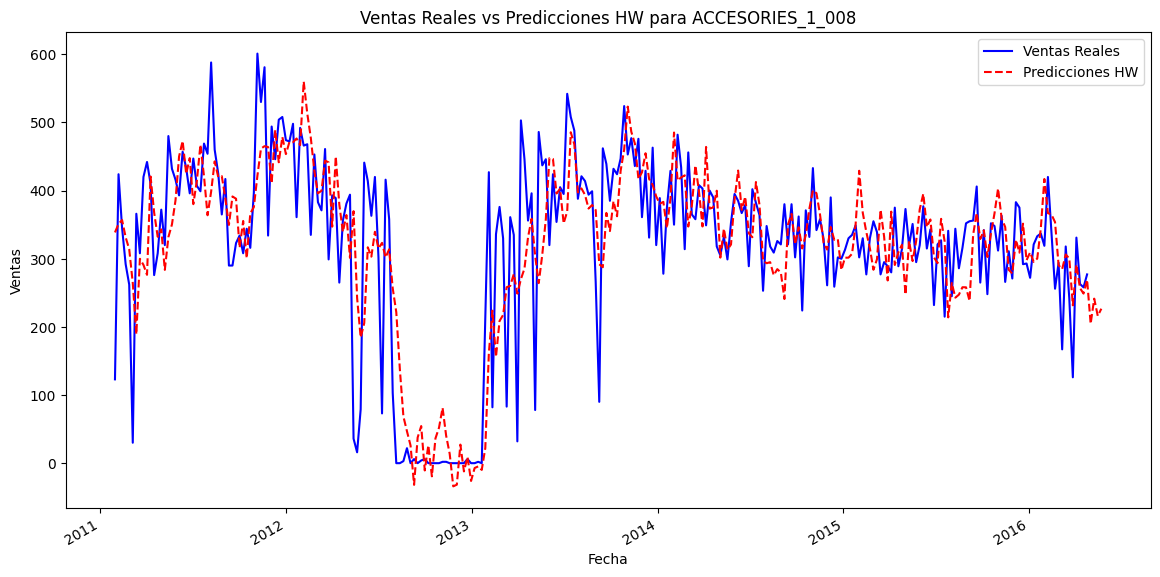

In [86]:


# Seleccionamos un producto en específico
real_sales_hw = final_combined_forecast_hw[f'y_ACCESORIES_1_008']
predicted_sales_hw = final_combined_forecast_hw[f'yhat_hw_ACCESORIES_1_008']

plt.figure(figsize=(14, 7))
plt.plot(real_sales_hw, label='Ventas Reales', color='blue')
plt.plot(predicted_sales_hw, label='Predicciones HW', color='red', linestyle='--')
plt.title('Ventas Reales vs Predicciones HW para ACCESORIES_1_008')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

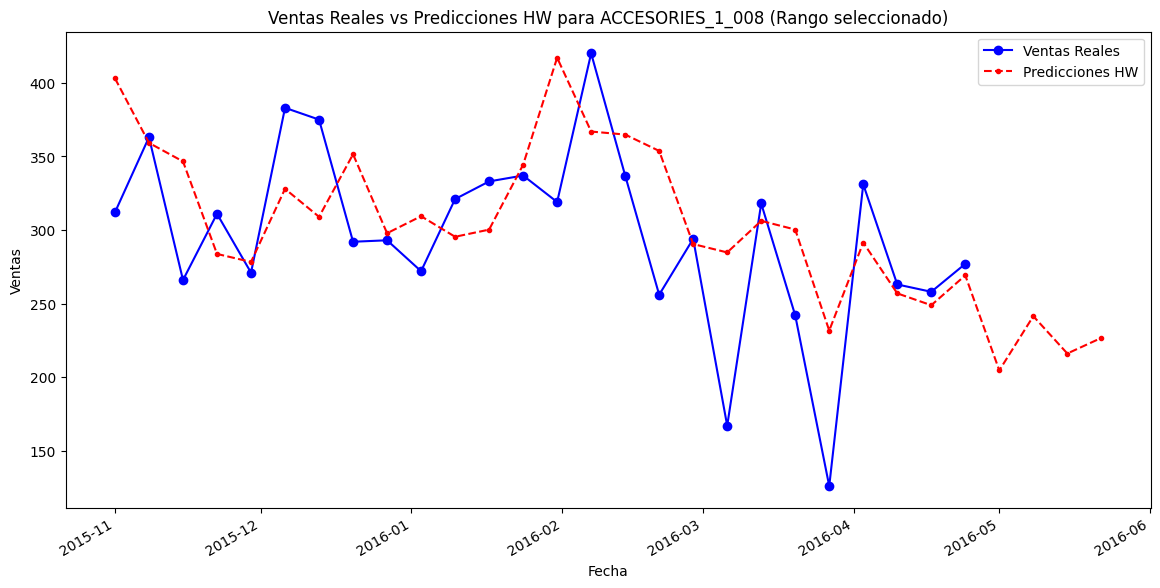

In [87]:
# Definimos el rango de fechas
start_date = '2015-11-01'
end_date = '2016-05-22'

# Filtra el DataFrame por el rango de fechas
mask = (final_combined_forecast_hw.index >= start_date) & (final_combined_forecast_hw.index <= end_date)
filtered_forecast_hw = final_combined_forecast_hw.loc[mask]

# Selecciona las series de tiempo de ventas reales y predicciones para 'ACCESORIES_1_008'(por ejemplo) dentro del rango de fechas
real_sales_hw = filtered_forecast_hw[f'y_ACCESORIES_1_008']
predicted_sales_hw = filtered_forecast_hw[f'yhat_hw_ACCESORIES_1_008']

plt.figure(figsize=(14, 7))
plt.plot(real_sales_hw.index, real_sales_hw, label='Ventas Reales', color='blue', marker='o')
plt.plot(predicted_sales_hw.index, predicted_sales_hw, label='Predicciones HW', color='red', linestyle='--', marker='.')
plt.title('Ventas Reales vs Predicciones HW para ACCESORIES_1_008 (Rango seleccionado)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [88]:
final_combined_forecast_hw

,yhat_hw_ACCESORIES_1_008,y_ACCESORIES_1_008,yhat_hw_ACCESORIES_1_015,y_ACCESORIES_1_015,yhat_hw_ACCESORIES_1_178,y_ACCESORIES_1_178,yhat_hw_ACCESORIES_1_254,y_ACCESORIES_1_254,yhat_hw_ACCESORIES_1_256,y_ACCESORIES_1_256,...,yhat_hw_SUPERMARKET_3_586,y_SUPERMARKET_3_586,yhat_hw_SUPERMARKET_3_587,y_SUPERMARKET_3_587,yhat_hw_SUPERMARKET_3_694,y_SUPERMARKET_3_694,yhat_hw_SUPERMARKET_3_714,y_SUPERMARKET_3_714,yhat_hw_SUPERMARKET_3_723,y_SUPERMARKET_3_723
2011-01-30,338.624081,123.0,338.182979,133.0,347.027902,105.0,290.164652,152.0,353.106489,258.0,...,2331.882326,995.0,1600.706308,651.0,941.587752,521.0,879.400128,453.0,672.365221,575.0
2011-02-06,351.124474,424.0,231.693295,211.0,308.753858,378.0,339.169649,469.0,424.404978,551.0,...,2545.510288,3019.0,1134.165357,2233.0,1085.894346,1587.0,962.237044,1185.0,1039.487642,1980.0
2011-02-13,356.687672,345.0,265.801275,357.0,259.783881,298.0,376.058809,549.0,404.633594,525.0,...,3036.655623,3533.0,2063.129849,2773.0,1406.124922,1639.0,1133.157372,1479.0,1053.730122,147.0
2011-02-20,331.524630,292.0,258.880253,226.0,279.811132,195.0,371.456477,350.0,460.329437,437.0,...,3241.642552,3359.0,2570.512335,2361.0,1622.982711,1636.0,1436.949126,1371.0,226.564253,0.0
2011-02-27,313.913915,262.0,233.178028,290.0,303.654612,280.0,395.388180,457.0,481.839274,514.0,...,3088.769795,3214.0,2407.841501,2526.0,1525.364375,1516.0,1352.568105,1347.0,77.398520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-24,269.161764,277.0,220.852426,260.0,281.442184,301.0,419.100906,387.0,236.984503,209.0,...,2752.892935,2870.0,1711.425706,1643.0,1361.099741,1360.0,1296.796573,1309.0,1259.267250,1249.0
2016-05-01,204.598521,NaN,245.802218,NaN,204.982149,NaN,447.939099,NaN,186.614833,NaN,...,3052.706391,NaN,1839.189212,NaN,1503.478706,NaN,1521.371418,NaN,1315.137602,NaN
2016-05-08,241.446526,NaN,215.132908,NaN,232.894069,NaN,415.076807,NaN,223.557089,NaN,...,3111.695222,NaN,1865.965588,NaN,1578.784446,NaN,1520.644478,NaN,1279.597900,NaN
2016-05-15,216.074247,NaN,237.468769,NaN,196.450666,NaN,460.369981,NaN,190.010226,NaN,...,3008.556586,NaN,1720.492476,NaN,1501.103718,NaN,1506.735458,NaN,910.152944,NaN


In [89]:
## EVALUAMOS RMSE 
item_models_hw

{'ACCESORIES_1_008': {'model_hw': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x1edec5e9400>,
  'forecast_hw':                yhat_hw
  2011-01-30  338.624081
  2011-02-06  351.124474
  2011-02-13  356.687672
  2011-02-20  331.524630
  2011-02-27  313.913915
  ...                ...
  2016-04-24  269.161764
  2016-05-01  204.598521
  2016-05-08  241.446526
  2016-05-15  216.074247
  2016-05-22  226.670441
  
  [278 rows x 1 columns]},
 'ACCESORIES_1_015': {'model_hw': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x1eb86df5940>,
  'forecast_hw':                yhat_hw
  2011-01-30  338.182979
  2011-02-06  231.693295
  2011-02-13  265.801275
  2011-02-20  258.880253
  2011-02-27  233.178028
  ...                ...
  2016-04-24  220.852426
  2016-05-01  245.802218
  2016-05-08  215.132908
  2016-05-15  237.468769
  2016-05-22  201.772462
  
  [278 rows x 1 columns]},
 'ACCESORIES_1_178': {'model_hw': <statsmodels.tsa.holtwinters.results.HoltWin

In [90]:
df26hww['date'] = pd.to_datetime(df26hww['date'])

# Dividimos los datos en conjuntos de entrenamiento y prueba
# Aquí estamos tomando los últimos 4 meses como datos de prueba
cutoff_date = df26hww['date'].max() - pd.DateOffset(months=6)
train_df = df26hww[df26hww['date'] <= cutoff_date]
test_df = df26hww[df26hww['date'] > cutoff_date]

# Inicializa el diccionario para guardar los RMSE de cada artículo
item_rmse = {}

# Ahora ajustamos el modelo Holt-Winters para cada artículo y calculamos el RMSE
for item in train_df['item'].unique():
    train_series = train_df[train_df['item'] == item]['sales']
    test_series = test_df[test_df['item'] == item]['sales']

    # Ajustamos el modelo en el conjunto de entrenamiento
    model = ExponentialSmoothing(train_series, seasonal='add', seasonal_periods=52).fit()

    # Realizamos predicciones en el conjunto de prueba
    pred = model.forecast(len(test_series))

    # Calculamos el RMSE y se guarda en el diccionario
    rmse = sqrt(mean_squared_error(test_series, pred))
    item_rmse[item] = rmse

# Convertimos el diccionario de RMSE a DataFrame para verlo mejor
rmse_df = pd.DataFrame(list(item_rmse.items()), columns=['item', 'RMSE'])
rmse_df

C:\Users\pazcr\AppData\Local\Temp\ipykernel_7220\1520947265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df26hww['date'] = pd.to_datetime(df26hww['date'])
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\bas

,item,RMSE
0,ACCESORIES_1_008,125.460602
1,ACCESORIES_1_015,63.589604
2,ACCESORIES_1_178,146.230196
3,ACCESORIES_1_254,64.272659
4,ACCESORIES_1_256,74.756321
5,ACCESORIES_1_268,144.486366
6,ACCESORIES_1_341,132.020287
7,ACCESORIES_1_348,153.553057
8,ACCESORIES_1_370,63.893413
9,ACCESORIES_1_371,138.664561


## 4 Modelo Prophet para productos y su store 

In [91]:
df_weekdt=df_week.copy()

In [92]:
df_weekdt

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,2011-02-06,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,2011-02-06,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,2011-02-06,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45966972,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,3.5760,2016-04-22,Friday,Laboral Day
45966973,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,2.9760,2016-04-22,Friday,Laboral Day
45966974,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,4.7760,2016-04-22,Friday,Laboral Day
45966975,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,3,2016-04-24,1.5360,2016-04-22,Friday,Laboral Day


In [93]:
df_weekdt.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 45966977 entries, 0 to 45966976
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   item        object        
 2   category    object        
 3   department  object        
 4   store       object        
 5   store_code  object        
 6   d           object        
 7   sales       int64         
 8   yearweek    datetime64[ns]
 9   sell_price  float64       
 10  date        datetime64[ns]
 11  weekday     object        
 12  event       object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 4.8+ GB


In [94]:
# Función para obtener algunos productos más vendidos por categoria con sus tiendas(10 de acs,10 de superm y 10 de home and garden aunque luego borramos 5 de esta última)
def process_sales_data2(df_weekdt):
    # Convertimos la fecha a datetime(nos aseguramos)
    df_weekdt['date'] = pd.to_datetime(df_weekdt['date'])
    
    # Calcula ventas semanales por artículo y tienda
    #df_week['yearweek'] = df_week['date'].dt.strftime('%Y%U') # no ejecutar esto ,yearweek dejaría de ser dt 
    weekly_sales = df_weekdt.groupby(['item', 'store', 'yearweek'])['sales'].sum().reset_index(name='weekly_sales')

    # Calcula las ventas totales por artículo y categoría
    total_sales_per_item_category = df_weekdt.groupby(['item', 'category'])['sales'].sum().reset_index()

    # Encuentra los 10 artículos más vendidos por categoría
    top_items_list = []
    for category in total_sales_per_item_category['category'].unique():
        top_items = total_sales_per_item_category[total_sales_per_item_category['category'] == category].nlargest(5, 'sales')['item']
        top_items_list.extend(top_items.tolist())

    # Filtra los datos originales para incluir solo los artículos más vendidos
    df_top_items = df_weekdt[df_weekdt['item'].isin(top_items_list)]

    # Agrupa por artículo, tienda y fecha para obtener ventas semanales de los artículos más vendidos
    top_items_weekly_sales = df_top_items.groupby(['item', 'store', pd.Grouper(key='date', freq='W')])['sales'].sum().reset_index()

    return top_items_weekly_sales

In [95]:
df_weekdt["store"].unique()

array(['Greenwich_Village', 'Harlem', 'Tribeca', 'Brooklyn', 'South_End',
       'Roxbury', 'Back_Bay', 'Midtown_Village', 'Yorktown',
       'Queen_Village'], dtype=object)

In [96]:

# ejecutamos la funcion en el df
df3it = process_sales_data2(df_weekdt)




In [97]:
df_weekdt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45966977 entries, 0 to 45966976
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   item        object        
 2   category    object        
 3   department  object        
 4   store       object        
 5   store_code  object        
 6   d           object        
 7   sales       int64         
 8   yearweek    datetime64[ns]
 9   sell_price  float64       
 10  date        datetime64[ns]
 11  weekday     object        
 12  event       object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 4.8+ GB


In [98]:
df3it

,item,store,date,sales
0,ACCESORIES_1_178,Back_Bay,2011-01-30,10
1,ACCESORIES_1_178,Back_Bay,2011-02-06,16
2,ACCESORIES_1_178,Back_Bay,2011-02-13,6
3,ACCESORIES_1_178,Back_Bay,2011-02-20,17
4,ACCESORIES_1_178,Back_Bay,2011-02-27,9
...,...,...,...,...
38670,SUPERMARKET_3_714,Yorktown,2016-03-27,118
38671,SUPERMARKET_3_714,Yorktown,2016-04-03,129
38672,SUPERMARKET_3_714,Yorktown,2016-04-10,126
38673,SUPERMARKET_3_714,Yorktown,2016-04-17,183


In [99]:
df3it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38675 entries, 0 to 38674
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   item    38675 non-null  object        
 1   store   38675 non-null  object        
 2   date    38675 non-null  datetime64[ns]
 3   sales   38675 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [100]:
df3it.isnull().sum()

item     0
store    0
date     0
sales    0
dtype: int64

In [101]:
items_to_remove = ["HOME_&_GARDEN_1_019", "HOME_&_GARDEN_1_083", 
                   "HOME_&_GARDEN_1_110", "HOME_&_GARDEN_1_334", 
                   "HOME_&_GARDEN_1_459"]

#usamos el diccionario para borrar las variabels deseadas
df3it = df3it[~df3it['item'].isin(items_to_remove)]

In [102]:
df3it["item"].unique()

array(['ACCESORIES_1_178', 'ACCESORIES_1_268', 'ACCESORIES_1_341',
       'ACCESORIES_1_348', 'ACCESORIES_1_371', 'HOME_&_GARDEN_1_303',
       'HOME_&_GARDEN_1_521', 'SUPERMARKET_3_090', 'SUPERMARKET_3_252',
       'SUPERMARKET_3_555', 'SUPERMARKET_3_586', 'SUPERMARKET_3_714'],
      dtype=object)

In [103]:
# Modelo Prophet Productos_tienda
# Preparamos el DataFrame para las predicciones ajustadas y futuras de todos los productos y tiendas
final_forecasts_combined_hwstore1 = pd.DataFrame()

# Itera sobre cada combinación de artículo y tienda
for (item, store), group_df in df3it.groupby(['item', 'store']):
    
    # Filtra el dataframe para el artículo y tienda actual
    item_store_df_hwstore1 = group_df[['date', 'sales']].copy()
    item_store_df_hwstore1.set_index('date', inplace=True)
    item_store_df_hwstore1.sort_index(inplace=True)
    
    # Inicializa y ajusta el modelo de Holt-Winters para las ventas semanales
    model_hwstore1 = ExponentialSmoothing(item_store_df_hwstore1, seasonal='add', seasonal_periods=52).fit()
    
    # Crea el df para almacenar las predicciones ajustadas y futuras
    fitted_values_hwstore1 = model_hwstore1.fittedvalues
    forecast_values_hwstore1 = model_hwstore1.forecast(12)
    
    # Une las predicciones ajustadas y futuras
    combined_hwstore1 = pd.concat([fitted_values_hwstore1, forecast_values_hwstore1], axis=0)
    
    # Creamos un DataFrame para almacenar las predicciones ajustadas y futuras con las ventas reales
    combined_hw_df_hwstore1 = pd.DataFrame({
        f'yhat_{item}_{store}': combined_hwstore1,
        f'y_{item}_{store}': item_store_df_hwstore1['sales']
    })
    
    # Unimos  este DataFrame con el df final
    final_forecasts_combined_hwstore1 = pd.concat([final_forecasts_combined_hwstore1, combined_hw_df_hwstore1], axis=1)

# Reindexa  el DataFrame final para incluir todas las fechas posibles
all_dates_hwstore1 = pd.date_range(start=df3it['date'].min(), end=df3it['date'].max() + pd.Timedelta(weeks=12), freq='W-SUN')
final_forecasts_combined_hwstore1 = final_forecasts_combined_hwstore1.reindex(all_dates_hwstore1)
final_forecasts_combined_hwstore1

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python

,yhat_ACCESORIES_1_178_Back_Bay,y_ACCESORIES_1_178_Back_Bay,yhat_ACCESORIES_1_178_Brooklyn,y_ACCESORIES_1_178_Brooklyn,yhat_ACCESORIES_1_178_Greenwich_Village,y_ACCESORIES_1_178_Greenwich_Village,yhat_ACCESORIES_1_178_Harlem,y_ACCESORIES_1_178_Harlem,yhat_ACCESORIES_1_178_Midtown_Village,y_ACCESORIES_1_178_Midtown_Village,...,yhat_SUPERMARKET_3_714_Queen_Village,y_SUPERMARKET_3_714_Queen_Village,yhat_SUPERMARKET_3_714_Roxbury,y_SUPERMARKET_3_714_Roxbury,yhat_SUPERMARKET_3_714_South_End,y_SUPERMARKET_3_714_South_End,yhat_SUPERMARKET_3_714_Tribeca,y_SUPERMARKET_3_714_Tribeca,yhat_SUPERMARKET_3_714_Yorktown,y_SUPERMARKET_3_714_Yorktown
2011-01-30,7.394822,10.0,47.152352,14.0,59.815947,29.0,44.578661,17.0,40.144830,25.0,...,145.024708,85.0,69.845169,52.0,59.346982,55.0,85.477506,35.0,60.524093,39.0
2011-02-06,16.579744,16.0,53.145676,95.0,76.043587,84.0,49.744759,74.0,24.635718,34.0,...,181.766087,228.0,75.625667,107.0,103.001871,111.0,92.002740,129.0,82.792335,111.0
2011-02-13,10.180408,6.0,75.863851,86.0,59.393040,48.0,40.490039,69.0,26.981086,51.0,...,209.313688,251.0,118.854500,168.0,116.401984,124.0,110.365847,159.0,94.254091,134.0
2011-02-20,16.918252,17.0,48.626682,47.0,48.839927,41.0,48.621580,20.0,28.167402,23.0,...,219.966428,181.0,175.366837,181.0,146.335920,119.0,157.370760,156.0,136.298318,145.0
2011-02-27,8.526963,9.0,58.393614,73.0,47.915475,57.0,57.189968,39.0,41.858870,23.0,...,206.938267,207.0,182.724756,171.0,114.318370,134.0,132.463806,128.0,129.730022,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-19,24.533593,NaN,23.050567,NaN,33.027556,NaN,22.387799,NaN,45.100850,NaN,...,182.328372,NaN,185.916015,NaN,134.134593,NaN,231.834682,NaN,183.899128,NaN
2016-06-26,25.878224,NaN,21.042506,NaN,13.142356,NaN,12.401906,NaN,34.912117,NaN,...,218.701637,NaN,167.952232,NaN,119.732557,NaN,230.933252,NaN,174.126180,NaN
2016-07-03,35.890658,NaN,3.246549,NaN,35.416738,NaN,11.431719,NaN,37.094383,NaN,...,245.545879,NaN,161.767197,NaN,150.876751,NaN,286.056990,NaN,204.918877,NaN
2016-07-10,33.961514,NaN,27.650329,NaN,24.461435,NaN,6.718947,NaN,35.318987,NaN,...,247.719880,NaN,164.094679,NaN,129.964654,NaN,241.950744,NaN,184.628838,NaN


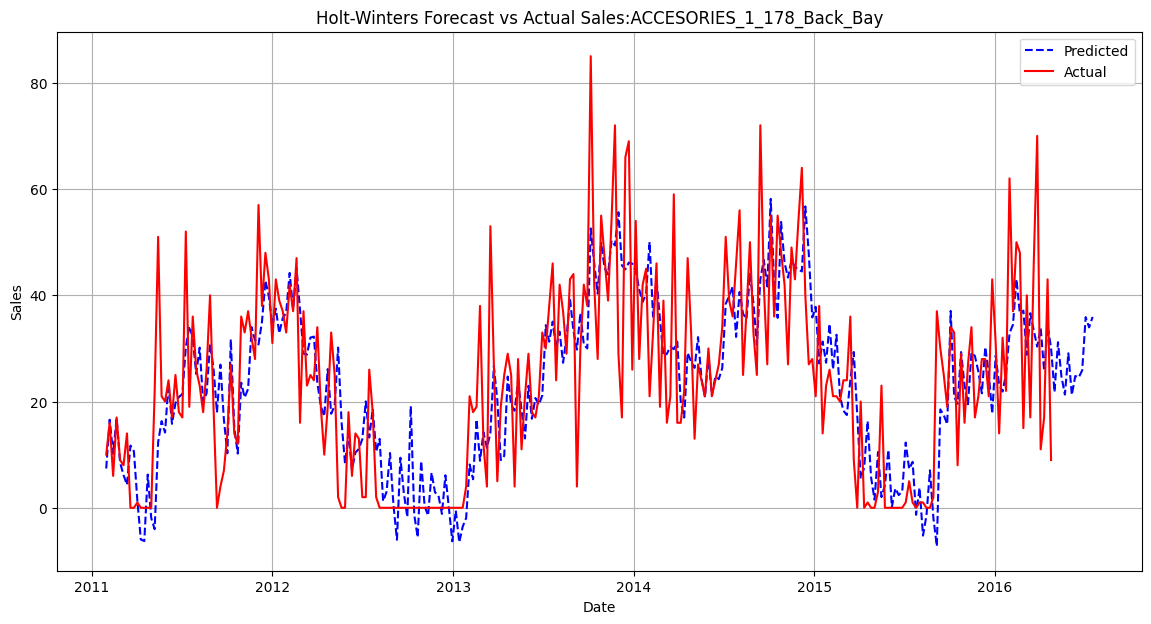

In [104]:
# comparamos las predicciones con ventas reales de algun produc en específico.
filtered_df = final_forecasts_combined_hwstore1[[f'yhat_ACCESORIES_1_178_Back_Bay', f'y_ACCESORIES_1_178_Back_Bay']]

filtered_df.index = pd.to_datetime(filtered_df.index) 

# ajustamos fechas 
start_date = '2011-01-30'
end_date = '2016-07-17'
mask = (filtered_df.index >= start_date) & (filtered_df.index <= end_date)
filtered_df = filtered_df.loc[mask]
plt.figure(figsize=(14, 7))
plt.plot(filtered_df.index, filtered_df[f'yhat_ACCESORIES_1_178_Back_Bay'], label='Predicted', color='blue', linestyle='--')
plt.plot(filtered_df.index, filtered_df[f'y_ACCESORIES_1_178_Back_Bay'], label='Actual', color='red')
plt.title('Holt-Winters Forecast vs Actual Sales:'"ACCESORIES_1_178_Back_Bay")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
predic_hwstore1=final_forecasts_combined_hwstore1.copy()

In [106]:
# Convertimos todas las columnas flotantes a cadena y reemplazamos puntos por comas para el powerbi
for col in predic_hwstore1.select_dtypes(include=['float']):
    predic_hwstore1[col] = predic_hwstore1[col].apply(lambda x: f'{x:.2f}'.replace('.', ','))


In [107]:
predic_hwstore1.head()

,yhat_ACCESORIES_1_178_Back_Bay,y_ACCESORIES_1_178_Back_Bay,yhat_ACCESORIES_1_178_Brooklyn,y_ACCESORIES_1_178_Brooklyn,yhat_ACCESORIES_1_178_Greenwich_Village,y_ACCESORIES_1_178_Greenwich_Village,yhat_ACCESORIES_1_178_Harlem,y_ACCESORIES_1_178_Harlem,yhat_ACCESORIES_1_178_Midtown_Village,y_ACCESORIES_1_178_Midtown_Village,...,yhat_SUPERMARKET_3_714_Queen_Village,y_SUPERMARKET_3_714_Queen_Village,yhat_SUPERMARKET_3_714_Roxbury,y_SUPERMARKET_3_714_Roxbury,yhat_SUPERMARKET_3_714_South_End,y_SUPERMARKET_3_714_South_End,yhat_SUPERMARKET_3_714_Tribeca,y_SUPERMARKET_3_714_Tribeca,yhat_SUPERMARKET_3_714_Yorktown,y_SUPERMARKET_3_714_Yorktown
2011-01-30,"7,39","10,00","47,15","14,00","59,82","29,00","44,58","17,00","40,14","25,00",...,"145,02","85,00","69,85","52,00","59,35","55,00","85,48","35,00","60,52","39,00"
2011-02-06,"16,58","16,00","53,15","95,00","76,04","84,00","49,74","74,00","24,64","34,00",...,"181,77","228,00","75,63","107,00","103,00","111,00","92,00","129,00","82,79","111,00"
2011-02-13,"10,18","6,00","75,86","86,00","59,39","48,00","40,49","69,00","26,98","51,00",...,"209,31","251,00","118,85","168,00","116,40","124,00","110,37","159,00","94,25","134,00"
2011-02-20,"16,92","17,00","48,63","47,00","48,84","41,00","48,62","20,00","28,17","23,00",...,"219,97","181,00","175,37","181,00","146,34","119,00","157,37","156,00","136,30","145,00"
2011-02-27,"8,53","9,00","58,39","73,00","47,92","57,00","57,19","39,00","41,86","23,00",...,"206,94","207,00","182,72","171,00","114,32","134,00","132,46","128,00","129,73","116,00"


In [108]:
#Crea un nuevo diccionario con los nombres de las columnas actuales y los nombres deseados
new_column_names_hwstore = {col: col.replace('yhat_', '') for col in predic_hwstore1.columns if 'yhat_' in col}

 #Renombramos las columnas usando el diccionario
predic_hwstore1_renamed = predic_hwstore1.rename(columns=new_column_names_hwstore)
predic_hwstore1_renamed.head()


,ACCESORIES_1_178_Back_Bay,y_ACCESORIES_1_178_Back_Bay,ACCESORIES_1_178_Brooklyn,y_ACCESORIES_1_178_Brooklyn,ACCESORIES_1_178_Greenwich_Village,y_ACCESORIES_1_178_Greenwich_Village,ACCESORIES_1_178_Harlem,y_ACCESORIES_1_178_Harlem,ACCESORIES_1_178_Midtown_Village,y_ACCESORIES_1_178_Midtown_Village,...,SUPERMARKET_3_714_Queen_Village,y_SUPERMARKET_3_714_Queen_Village,SUPERMARKET_3_714_Roxbury,y_SUPERMARKET_3_714_Roxbury,SUPERMARKET_3_714_South_End,y_SUPERMARKET_3_714_South_End,SUPERMARKET_3_714_Tribeca,y_SUPERMARKET_3_714_Tribeca,SUPERMARKET_3_714_Yorktown,y_SUPERMARKET_3_714_Yorktown
2011-01-30,"7,39","10,00","47,15","14,00","59,82","29,00","44,58","17,00","40,14","25,00",...,"145,02","85,00","69,85","52,00","59,35","55,00","85,48","35,00","60,52","39,00"
2011-02-06,"16,58","16,00","53,15","95,00","76,04","84,00","49,74","74,00","24,64","34,00",...,"181,77","228,00","75,63","107,00","103,00","111,00","92,00","129,00","82,79","111,00"
2011-02-13,"10,18","6,00","75,86","86,00","59,39","48,00","40,49","69,00","26,98","51,00",...,"209,31","251,00","118,85","168,00","116,40","124,00","110,37","159,00","94,25","134,00"
2011-02-20,"16,92","17,00","48,63","47,00","48,84","41,00","48,62","20,00","28,17","23,00",...,"219,97","181,00","175,37","181,00","146,34","119,00","157,37","156,00","136,30","145,00"
2011-02-27,"8,53","9,00","58,39","73,00","47,92","57,00","57,19","39,00","41,86","23,00",...,"206,94","207,00","182,72","171,00","114,32","134,00","132,46","128,00","129,73","116,00"


In [109]:
# Reseteamos el índice para convertir las fechas en una columna regular llamada 'ds'
predic_hwstore1_renamed = predic_hwstore1_renamed.reset_index().rename(columns={'index': 'ds'})
predic_hwstore1_renamed

,ds,ACCESORIES_1_178_Back_Bay,y_ACCESORIES_1_178_Back_Bay,ACCESORIES_1_178_Brooklyn,y_ACCESORIES_1_178_Brooklyn,ACCESORIES_1_178_Greenwich_Village,y_ACCESORIES_1_178_Greenwich_Village,ACCESORIES_1_178_Harlem,y_ACCESORIES_1_178_Harlem,ACCESORIES_1_178_Midtown_Village,...,SUPERMARKET_3_714_Queen_Village,y_SUPERMARKET_3_714_Queen_Village,SUPERMARKET_3_714_Roxbury,y_SUPERMARKET_3_714_Roxbury,SUPERMARKET_3_714_South_End,y_SUPERMARKET_3_714_South_End,SUPERMARKET_3_714_Tribeca,y_SUPERMARKET_3_714_Tribeca,SUPERMARKET_3_714_Yorktown,y_SUPERMARKET_3_714_Yorktown
0,2011-01-30,"7,39","10,00","47,15","14,00","59,82","29,00","44,58","17,00","40,14",...,"145,02","85,00","69,85","52,00","59,35","55,00","85,48","35,00","60,52","39,00"
1,2011-02-06,"16,58","16,00","53,15","95,00","76,04","84,00","49,74","74,00","24,64",...,"181,77","228,00","75,63","107,00","103,00","111,00","92,00","129,00","82,79","111,00"
2,2011-02-13,"10,18","6,00","75,86","86,00","59,39","48,00","40,49","69,00","26,98",...,"209,31","251,00","118,85","168,00","116,40","124,00","110,37","159,00","94,25","134,00"
3,2011-02-20,"16,92","17,00","48,63","47,00","48,84","41,00","48,62","20,00","28,17",...,"219,97","181,00","175,37","181,00","146,34","119,00","157,37","156,00","136,30","145,00"
4,2011-02-27,"8,53","9,00","58,39","73,00","47,92","57,00","57,19","39,00","41,86",...,"206,94","207,00","182,72","171,00","114,32","134,00","132,46","128,00","129,73","116,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2016-06-19,"24,53",nan,"23,05",nan,"33,03",nan,"22,39",nan,"45,10",...,"182,33",nan,"185,92",nan,"134,13",nan,"231,83",nan,"183,90",nan
282,2016-06-26,"25,88",nan,"21,04",nan,"13,14",nan,"12,40",nan,"34,91",...,"218,70",nan,"167,95",nan,"119,73",nan,"230,93",nan,"174,13",nan
283,2016-07-03,"35,89",nan,"3,25",nan,"35,42",nan,"11,43",nan,"37,09",...,"245,55",nan,"161,77",nan,"150,88",nan,"286,06",nan,"204,92",nan
284,2016-07-10,"33,96",nan,"27,65",nan,"24,46",nan,"6,72",nan,"35,32",...,"247,72",nan,"164,09",nan,"129,96",nan,"241,95",nan,"184,63",nan


hacemos un melted para el powerbi

In [110]:

melted_df_hwstore1_renamed = predic_hwstore1_renamed.melt(id_vars=['ds'], 
                                                              var_name='item_store', 
                                                              value_name='sales')



In [111]:
melted_df_hwstore1_renamed

,ds,item_store,sales
0,2011-01-30,ACCESORIES_1_178_Back_Bay,"7,39"
1,2011-02-06,ACCESORIES_1_178_Back_Bay,"16,58"
2,2011-02-13,ACCESORIES_1_178_Back_Bay,"10,18"
3,2011-02-20,ACCESORIES_1_178_Back_Bay,"16,92"
4,2011-02-27,ACCESORIES_1_178_Back_Bay,"8,53"
...,...,...,...
68635,2016-06-19,y_SUPERMARKET_3_714_Yorktown,nan
68636,2016-06-26,y_SUPERMARKET_3_714_Yorktown,nan
68637,2016-07-03,y_SUPERMARKET_3_714_Yorktown,nan
68638,2016-07-10,y_SUPERMARKET_3_714_Yorktown,nan


In [112]:
#guardamos en csv para el pw
#csv_file_pathhwm = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\Usar_forecasting_correcto\forcasting_day\usar\csv_predic_holtwin\melted_predict_hwstore1_renamed.csv'
#melted_df_hwstore1_renamed.to_csv(csv_file_pathhwm, index=False)

## 4.1 Modelo HW para Tiendas 

Modelo HW para las tiendas en todas las ciudades

In [113]:
df_weekdt

,id,item,category,department,store,store_code,d,sales,yearweek,sell_price,date,weekday,event
0,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,12,2011-02-06,0.6118,2011-01-29,Saturday,Weekend
1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,2,2011-02-06,2.0748,2011-01-29,Saturday,Weekend
2,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,4.2161,2011-01-29,Saturday,Weekend
3,ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,0,2011-02-06,7.9534,2011-01-29,Saturday,Weekend
4,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,d_1,4,2011-02-06,0.9310,2011-01-29,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45966972,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,3.5760,2016-04-22,Friday,Laboral Day
45966973,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,2.9760,2016-04-22,Friday,Laboral Day
45966974,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,0,2016-04-24,4.7760,2016-04-22,Friday,Laboral Day
45966975,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,d_1911,3,2016-04-24,1.5360,2016-04-22,Friday,Laboral Day


In [114]:
df_weekdt.info() #yearweek y date= dt

<class 'pandas.core.frame.DataFrame'>
Index: 45966977 entries, 0 to 45966976
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   item        object        
 2   category    object        
 3   department  object        
 4   store       object        
 5   store_code  object        
 6   d           object        
 7   sales       int64         
 8   yearweek    datetime64[ns]
 9   sell_price  float64       
 10  date        datetime64[ns]
 11  weekday     object        
 12  event       object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 4.8+ GB


In [115]:
ts_dfm_week_store = df_weekdt.groupby(["yearweek", "store"])['sales'].sum().reset_index()
ts_dfm_week_store

,yearweek,store,sales
0,2011-02-06,Back_Bay,16936
1,2011-02-06,Brooklyn,10622
2,2011-02-06,Greenwich_Village,23715
3,2011-02-06,Harlem,17844
4,2011-02-06,Midtown_Village,12577
...,...,...,...
2725,2016-04-24,Queen_Village,26518
2726,2016-04-24,Roxbury,27243
2727,2016-04-24,South_End,23282
2728,2016-04-24,Tribeca,42834


In [116]:
ts_dfm_week_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   yearweek  2730 non-null   datetime64[ns]
 1   store     2730 non-null   object        
 2   sales     2730 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 64.1+ KB


In [117]:
ts_dfm_week_store.isnull().sum()

yearweek    0
store       0
sales       0
dtype: int64

In [118]:
# Renombramos las columnas
ts_dfm_week_store_sthww = ts_dfm_week_store.rename(columns={'yearweek': 'ds', 'sales': 'y'})  

# Aseguro de que 'ds' sea un tipo de dato de fecha
ts_dfm_week_store_sthww['ds'] = pd.to_datetime(ts_dfm_week_store_sthww['ds'])

# Número de semanas para predecir
num_weeks_to_predict_sthww = 12

# Función para aplicar el modelo de Holt Winters a cada grupo (tienda)
def forecast_holt_winters_sthww(group_sthww):
    # Ajustamos el modelo
    model_sthww = ExponentialSmoothing(group_sthww['y'], trend='add', seasonal='add', seasonal_periods=52)
    fit_model_sthww = model_sthww.fit()

    # Obtenemos las predicciones ajustadas para el periodo histórico(datos del pasado)
    fitted_values_sthww = fit_model_sthww.fittedvalues

    # Hacemos las predicciones para las próximas 12 semanas o las que queramos
    last_date_sthww = group_sthww['ds'].max()
    future_dates_sthww = pd.date_range(start=last_date_sthww, periods=num_weeks_to_predict_sthww + 1, 
                                 freq='W')[1:]  
    future_forecast_sthww = fit_model_sthww.forecast(steps=num_weeks_to_predict_sthww)

    # Creamos el DataFrame de predicciones ajustadas y futuras
    fitted_df_sthww = pd.DataFrame({'ds': group_sthww['ds'], 'yhat': fitted_values_sthww, 'store': group_sthww['store'].iloc[0]})
    future_df_sthww = pd.DataFrame({'ds': future_dates_sthww, 'yhat': future_forecast_sthww, 'store': group_sthww['store'].iloc[0]})

    # Retorna el df de predicciones
    return pd.concat([fitted_df_sthww, future_df_sthww])

# Aplica la función a cada grupo de tienda y concatenamos los resultados
all_predictions_sthww = pd.concat([forecast_holt_winters_sthww(group_sthww) for name, group_sthww in ts_dfm_week_store_sthww.groupby('store')])

# Ordenamos por tienda y fecha
all_predictions_sthww = all_predictions_sthww.sort_values(by=['store', 'ds'])

# Reseteamod el índice 
all_predictions_sthww.reset_index(drop=True, inplace=True)

# Ahora necesitamos juntar las ventas reales y las predicciones en un solo DataFrame asi para verlo mejor
merged_df_sthww = ts_dfm_week_store_sthww[['ds', 'store', 'y']].merge(all_predictions_sthww, on=['ds', 'store'], how='right')
merged_df_sthww



c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_ind

,ds,store,y,yhat
0,2011-02-06,Back_Bay,16936.0,15679.627416
1,2011-02-13,Back_Bay,15566.0,18724.259701
2,2011-02-20,Back_Bay,17411.0,18577.199946
3,2011-02-27,Back_Bay,15777.0,16261.040721
4,2011-03-06,Back_Bay,15301.0,15929.176082
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,40664.037841
2846,2016-06-26,Yorktown,NaN,37572.514854
2847,2016-07-03,Yorktown,NaN,43089.492029
2848,2016-07-10,Yorktown,NaN,45567.700790


In [119]:
merged_df_sthww

,ds,store,y,yhat
0,2011-02-06,Back_Bay,16936.0,15679.627416
1,2011-02-13,Back_Bay,15566.0,18724.259701
2,2011-02-20,Back_Bay,17411.0,18577.199946
3,2011-02-27,Back_Bay,15777.0,16261.040721
4,2011-03-06,Back_Bay,15301.0,15929.176082
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,40664.037841
2846,2016-06-26,Yorktown,NaN,37572.514854
2847,2016-07-03,Yorktown,NaN,43089.492029
2848,2016-07-10,Yorktown,NaN,45567.700790


In [120]:
csv_file_mg = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\Usar_forecasting_correcto\forcasting_day\usar\csv_predic_holtwin\merged_df_sthww29.csv'
merged_df_sthww.to_csv(csv_file_mg, index=False)

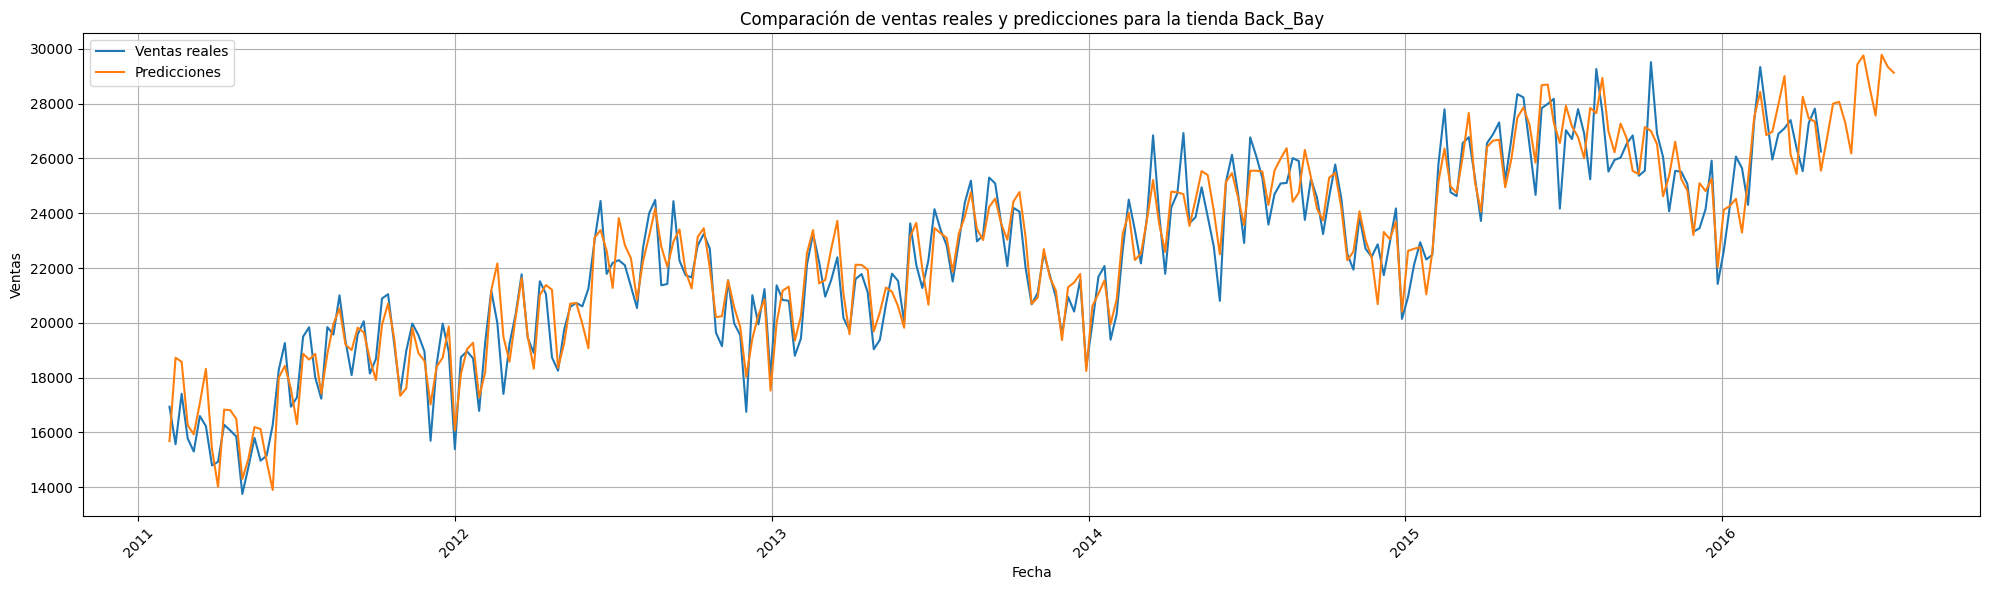

In [121]:
# comparamos las predicciones y ventas reales de alguna tienda en específico
store_name = "Back_Bay"
start_date = "2011-02-06"
end_date_actual = "2016-07-17"
end_date_pred = "2016-07-17"

filtered_df = merged_df_sthww[(merged_df_sthww['store'] == store_name) & 
                              (merged_df_sthww['ds'] >= start_date) & 
                              (merged_df_sthww['ds'] <= end_date_actual)]

plt.figure(figsize=(20, 6))
plt.plot(filtered_df['ds'], filtered_df['y'], label='Ventas reales')
plt.plot(filtered_df['ds'], filtered_df['yhat'], label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title(f'Comparación de ventas reales y predicciones para la tienda {store_name}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
merged_df_sthww

,ds,store,y,yhat
0,2011-02-06,Back_Bay,16936.0,15679.627416
1,2011-02-13,Back_Bay,15566.0,18724.259701
2,2011-02-20,Back_Bay,17411.0,18577.199946
3,2011-02-27,Back_Bay,15777.0,16261.040721
4,2011-03-06,Back_Bay,15301.0,15929.176082
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,40664.037841
2846,2016-06-26,Yorktown,NaN,37572.514854
2847,2016-07-03,Yorktown,NaN,43089.492029
2848,2016-07-10,Yorktown,NaN,45567.700790


In [123]:
merged_df_sthww.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2850 non-null   datetime64[ns]
 1   store   2850 non-null   object        
 2   y       2730 non-null   float64       
 3   yhat    2850 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 89.2+ KB


In [124]:
Yorktown_predictions = merged_df_sthww.loc[merged_df_sthww['store'] == 'Yorktown'] 
Yorktown_predictions

,ds,store,y,yhat
2565,2011-02-06,Yorktown,14369.0,9613.134652
2566,2011-02-13,Yorktown,13791.0,17534.717673
2567,2011-02-20,Yorktown,13489.0,17568.757032
2568,2011-02-27,Yorktown,11114.0,11015.231146
2569,2011-03-06,Yorktown,12148.0,9492.837288
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,40664.037841
2846,2016-06-26,Yorktown,NaN,37572.514854
2847,2016-07-03,Yorktown,NaN,43089.492029
2848,2016-07-10,Yorktown,NaN,45567.700790


Melted para el powerbi

In [125]:
merged_df_sthwwpw=merged_df_sthww.copy()

In [126]:
merged_df_sthwwpw[['y', 'yhat']] = merged_df_sthwwpw[['y', 'yhat']].applymap(lambda x: "{:.2f}".format(x).replace('.', ',') if pd.notnull(x) else x)


C:\Users\pazcr\AppData\Local\Temp\ipykernel_7220\4102281194.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df_sthwwpw[['y', 'yhat']] = merged_df_sthwwpw[['y', 'yhat']].applymap(lambda x: "{:.2f}".format(x).replace('.', ',') if pd.notnull(x) else x)


In [127]:
merged_df_sthwwpw.head()

,ds,store,y,yhat
0,2011-02-06,Back_Bay,"16936,00","15679,63"
1,2011-02-13,Back_Bay,"15566,00","18724,26"
2,2011-02-20,Back_Bay,"17411,00","18577,20"
3,2011-02-27,Back_Bay,"15777,00","16261,04"
4,2011-03-06,Back_Bay,"15301,00","15929,18"


In [128]:
# Creamos dos DataFrames separados, uno para las ventas reales y otro para las predicciones.
real_sales = merged_df_sthwwpw[['ds', 'store', 'y']].copy()
predicted_sales = merged_df_sthwwpw[['ds', 'store', 'yhat']].copy()

# Añadimos las letras "yhat_" al nombre de la tienda en el DataFrame de predicciones.
predicted_sales['store'] = 'yhat_' + predicted_sales['store']

# Renombramos la columna de predicciones para que coincida con la de ventas reales.
predicted_sales.rename(columns={'yhat': 'y'}, inplace=True)

# Concatenamos ambos DataFrames uno encima del otro.
combined_sales = pd.concat([real_sales, predicted_sales], axis=0)

# Ordenamos el df resultante para visualizarlo mejor
combined_sales.sort_values(by=['ds', 'store'], inplace=True)

# Reseteamos el índice .
combined_sales.reset_index(drop=True, inplace=True)

In [129]:
combined_sales 

,ds,store,y
0,2011-02-06,Back_Bay,"16936,00"
1,2011-02-06,Brooklyn,"10622,00"
2,2011-02-06,Greenwich_Village,"23715,00"
3,2011-02-06,Harlem,"17844,00"
4,2011-02-06,Midtown_Village,"12577,00"
...,...,...,...
5695,2016-07-17,yhat_Queen_Village,"32033,55"
5696,2016-07-17,yhat_Roxbury,"30654,23"
5697,2016-07-17,yhat_South_End,"24443,73"
5698,2016-07-17,yhat_Tribeca,"46996,32"


In [130]:
merged_df_sthwwpw

,ds,store,y,yhat
0,2011-02-06,Back_Bay,"16936,00","15679,63"
1,2011-02-13,Back_Bay,"15566,00","18724,26"
2,2011-02-20,Back_Bay,"17411,00","18577,20"
3,2011-02-27,Back_Bay,"15777,00","16261,04"
4,2011-03-06,Back_Bay,"15301,00","15929,18"
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,"40664,04"
2846,2016-06-26,Yorktown,NaN,"37572,51"
2847,2016-07-03,Yorktown,NaN,"43089,49"
2848,2016-07-10,Yorktown,NaN,"45567,70"


In [131]:
#csv_file_combined_sales = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\Usar_forecasting_correcto\forcasting_day\usar\csv_predic_holtwin\predict_hwst_combined_sales.csv'
#combined_sales.to_csv(csv_file_combined_sales, index=False)

In [132]:
#csv_file_merged_df_sthww = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\Grupo TFM\forcastingclustmABRI\Usar_forecasting_correcto\forcasting_day\usar\csv_predic_holtwin\predict_hwst_merged_df_sthww2.csv'
#merged_df_sthww.to_csv(csv_file_merged_df_sthww, index=False)

RMSE

In [133]:
merged_df_sthww

,ds,store,y,yhat
0,2011-02-06,Back_Bay,16936.0,15679.627416
1,2011-02-13,Back_Bay,15566.0,18724.259701
2,2011-02-20,Back_Bay,17411.0,18577.199946
3,2011-02-27,Back_Bay,15777.0,16261.040721
4,2011-03-06,Back_Bay,15301.0,15929.176082
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,40664.037841
2846,2016-06-26,Yorktown,NaN,37572.514854
2847,2016-07-03,Yorktown,NaN,43089.492029
2848,2016-07-10,Yorktown,NaN,45567.700790


rmse de una tienda en específico

In [134]:
# Filtramos los datos solo para la tienda 'Back_Bay'
back_bay_data = merged_df_sthww[merged_df_sthww['store'] == 'Back_Bay'].copy()

# Convertimos la columna 'ds' a formato de fecha
back_bay_data['ds'] = pd.to_datetime(back_bay_data['ds'])

back_bay_data = back_bay_data.dropna(subset=['y'])

# Definimos el final del conjunto de entrenamiento (ultimos 12 meses)
train_end_datebc2 = back_bay_data['ds'].max() - pd.DateOffset(months=12)

# Separamos los datos en conjunto de entrenamiento y prueba
train_databc2 = back_bay_data[back_bay_data['ds'] <= train_end_datebc2]
test_databc2 = back_bay_data[back_bay_data['ds'] > train_end_datebc2]

# Comprobamos que haya suficientes datos para el entrenamiento y la prueba
if len(train_databc2) > 0 and len(test_databc2) > 0:
    # Ajustamos el modelo Holt-Winters usando los datos de entrenamiento
    modelbc2 = ExponentialSmoothing(train_databc2['y'], trend='add', seasonal='add', seasonal_periods=52)
    fitted_modelbc2 = modelbc2.fit()

    # Obtenemos las predicciones ajustadas para el conjunto de prueba
    predictionsbc2 = fitted_modelbc2.forecast(steps=len(test_databc2))

    # Calculamos el RMSE para la tienda 'Back_Bay'
    rmsebc2 = sqrt(mean_squared_error(test_databc2['y'], predictionsbc2))
    print(f'El RMSE para la tienda Back_Bay es: {rmsebc2}')
else:
    print("No hay suficientes datos para entrenar o probar el modelo.")

El RMSE para la tienda Back_Bay es: 2713.9018439477845


c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [135]:
back_bay_data = merged_df_sthww[merged_df_sthww['store'] == 'Back_Bay']
back_bay_data.tail()


,ds,store,y,yhat
280,2016-06-19,Back_Bay,NaN,28620.501599
281,2016-06-26,Back_Bay,NaN,27564.920087
282,2016-07-03,Back_Bay,NaN,29782.367760
283,2016-07-10,Back_Bay,NaN,29346.406640
284,2016-07-17,Back_Bay,NaN,29128.545910


El RMSE para la tienda Back_Bay es: 2713.9018439477845


In [136]:
# Calculamos el promedio de las ventas de esta tienda
average_sales = back_bay_data['y'].mean()
average_sales

22275.787545787545

El RMSE para todas las tiendas(modelos)


In [137]:
merged_df_sthww

,ds,store,y,yhat
0,2011-02-06,Back_Bay,16936.0,15679.627416
1,2011-02-13,Back_Bay,15566.0,18724.259701
2,2011-02-20,Back_Bay,17411.0,18577.199946
3,2011-02-27,Back_Bay,15777.0,16261.040721
4,2011-03-06,Back_Bay,15301.0,15929.176082
...,...,...,...,...
2845,2016-06-19,Yorktown,NaN,40664.037841
2846,2016-06-26,Yorktown,NaN,37572.514854
2847,2016-07-03,Yorktown,NaN,43089.492029
2848,2016-07-10,Yorktown,NaN,45567.700790


In [138]:
merged_df_sthww['ds'] = pd.to_datetime(merged_df_sthww['ds'])

# Definimos el final del conjunto de prueba , ultimos 12 meses para test
test_end_date_stg1 = '2016-04-24'
train_start_date_stg1 = pd.to_datetime(test_end_date_stg1) - pd.DateOffset(months=12)

# Preparamos una lista para recoger los resultados temporales
rmse_results_list_stg1 = []

# Iteramos sobre cada tienda en el DataFrame
for store in merged_df_sthww['store'].unique():
    store_data_stg1 = merged_df_sthww[merged_df_sthww['store'] == store]
    
    # Separamos los datos en conjunto de entrenamiento y prueba
    train_data_stg1 = store_data_stg1[(store_data_stg1['ds'] < train_start_date_stg1) & (store_data_stg1['ds'] <= test_end_date_stg1)]
    test_data_stg1 = store_data_stg1[(store_data_stg1['ds'] >= train_start_date_stg1) & (store_data_stg1['ds'] <= test_end_date_stg1)]
    
    test_data_stg1 = test_data_stg1.dropna(subset=['y'])
    
    # Si hay suficientes datos, procedemos con el ajuste y la evaluación del modelo
    if not train_data_stg1.empty and not test_data_stg1.empty:
        # Ajustamos el modelo de Holt-Winters
        model_stg1 = ExponentialSmoothing(train_data_stg1['y'], trend='add', seasonal='add', seasonal_periods=52)
        fitted_model_stg1 = model_stg1.fit(optimized=True, use_brute=True)
        
        # Predecimos los valores para el conjunto de prueba
        test_predictions_stg1 = fitted_model_stg1.forecast(steps=len(test_data_stg1))
        
        # Calculamos el RMSE
        rmse_stg1 = sqrt(mean_squared_error(test_data_stg1['y'], test_predictions_stg1))
        
        # Agregamos el resultado a la lista de resultados
        rmse_results_list_stg1.append({'store': store, 'rmse': rmse_stg1})

# Creamos un DataFrame de los resultados
rmse_results_stg1 = pd.DataFrame(rmse_results_list_stg1)

# Ordenamos los resultados por RMSE para ver los modelos con mejor desempeño
rmse_results_stg1 = rmse_results_stg1.sort_values(by='rmse').reset_index(drop=True)

rmse_results_stg1

c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pazcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_ind

,store,rmse
0,Brooklyn,891.543286
1,South_End,1379.976059
2,Greenwich_Village,1492.680541
3,Midtown_Village,1564.428146
4,Tribeca,1991.909943
5,Roxbury,2276.144648
6,Queen_Village,2284.271618
7,Back_Bay,2713.901844
8,Yorktown,4500.276890
9,Harlem,13894.452968
